# SEMT Data Science and Applied Statics 
## $Hongze Lin - 2650079$
# Part B - Applied Statics 
        Answer Skeleton 
        1. Code Setup + Function Code 
        2. Final Answer (By Main Function) 
        3. Overall Explanation
---
# $Question 3$
#### Question 3 Set up - Code for basic Python Package and Data Set 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')
# Data Set
n = 100  # Number of Geiger counters
r = 0.4  # Detection rate (per second)
t = 10  # Time interval (seconds)
lambda_param = r * t  # Poisson distribution parameter = 4

# Question 3(a) 
---
#### Code: 

In [24]:
def problem_a():
    """
    Problem (a): Simulate 1000 samples of Y when α=1 
    Distribution choice: Since particles are detected independently at a constant rate, Xi ~ Poisson(λ = r t = 4)
    When α=1, all Wi=1, so Y = ΣXi ~ Poisson(nλ = 400)
    """
    print("Problem (a): Simulate Y (α=1)" )
    n_samples = 1000
    # Simulate detection counts for each counter Xi ~ Poisson(4) 
    X = np.random.poisson(lambda_param, size=(n_samples, n))
    # Simulate successful transmission Wi ~ Bernoulli(α=1), i.e., all Wi=1
    W = np.random.binomial(1, 1.0, size=(n_samples, n))
    # Compute Y = Σ(Wi * Xi)
    Y = np.sum(W * X, axis=1)
    # Plot empirical distribution and CDF
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    # Left: Empirical distribution (histogram)
    axes[0].hist(Y, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0].set_xlabel('Y value')
    axes[0].set_ylabel('Density')
    axes[0].set_title(f'Empirical distribution of Y (α=1, n={n}, λ={lambda_param})')
    axes[0].grid(True, alpha=0.3)
    # Overlay theoretical Poisson distribution
    y_range = np.arange(Y.min(), Y.max() + 1)
    poisson_theory = stats.poisson.pmf(y_range, n * lambda_param)
    axes[0].plot(y_range, poisson_theory, 'r-', linewidth=2, label=f'Poisson(λ={n * lambda_param})')
    axes[0].legend()
    # Right: Empirical CDF
    sorted_Y = np.sort(Y)
    empirical_cdf = np.arange(1, len(sorted_Y) + 1) / len(sorted_Y)
    axes[1].plot(sorted_Y, empirical_cdf, 'b-', linewidth=2, label='Empirical CDF')
    # Overlay theoretical CDF
    y_range_cdf = np.arange(0, Y.max() + 1)
    poisson_cdf = stats.poisson.cdf(y_range_cdf, n * lambda_param)
    # Figure Plotting
    axes[1].plot(y_range_cdf, poisson_cdf, 'r--', linewidth=2, label=f'Poisson(λ={n * lambda_param}) CDF')
    axes[1].set_xlabel('Y value')
    axes[1].set_ylabel('Cumulative probability')
    axes[1].set_title('Empirical cumulative distribution function of Y')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('problem_a_distribution.png', dpi=300, bbox_inches='tight')
    # Print Answer
    print("Statistics of Y:")
    print(f"  Mean: {np.mean(Y):.2f} (theoretical value: {n * lambda_param})")
    print(f"  Standard deviation: {np.std(Y):.2f} (theoretical value: {np.sqrt(n * lambda_param):.2f})")
    print(f"  Minimum: {np.min(Y)}, Maximum: {np.max(Y)}")
    print("Figure saved as: problem_a_distribution.png\n")
    return Y

## Question 2(b)
---
#### Code:

In [25]:
def problem_b(Y_exact):
    """
    Problem (b): Implement two approximate simulation models
    1. Normal approximation: According to the central limit theorem, Y is approximately normal
    2. Poisson approximation: Directly use Poisson(nλ) distribution
    """
    print("=" * 60)
    print("Problem (b): Approximate simulation models")
    print("=" * 60)

    n_samples = 1000
    # Approximate model 1: Normal approximation
    # By the central limit theorem, Y ~ N(nλ, nλ)
    mean_normal = n * lambda_param
    std_normal = np.sqrt(n * lambda_param)
    Y_normal = np.random.normal(mean_normal, std_normal, n_samples)
    Y_normal = np.maximum(0, np.round(Y_normal))  # Ensure non-negative integers
    # Approximate model 2: Poisson approximation
    # Directly use Poisson(nλ) distribution
    Y_poisson = np.random.poisson(n * lambda_param, n_samples)
    # Plot CDF comparison
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    # CDF of exact model
    sorted_Y_exact = np.sort(Y_exact)
    empirical_cdf_exact = np.arange(1, len(sorted_Y_exact) + 1) / len(sorted_Y_exact)
    ax.plot(sorted_Y_exact, empirical_cdf_exact, 'b-', linewidth=2, label='Exact model (a)')
    # Normal approximation CDF
    sorted_Y_normal = np.sort(Y_normal)
    empirical_cdf_normal = np.arange(1, len(sorted_Y_normal) + 1) / len(sorted_Y_normal)
    ax.plot(sorted_Y_normal, empirical_cdf_normal, 'g--', linewidth=2, label='Approximate model 1: Normal approximation')
    # Poisson approximation CDF
    sorted_Y_poisson = np.sort(Y_poisson)
    empirical_cdf_poisson = np.arange(1, len(sorted_Y_poisson) + 1) / len(sorted_Y_poisson)
    # Figure Plotting
    ax.plot(sorted_Y_poisson, empirical_cdf_poisson, 'r:', linewidth=2, label='Approximate model 2: Poisson approximation')
    ax.set_xlabel('Y value')
    ax.set_ylabel('Cumulative probability')
    ax.set_title('Comparison of CDFs of approximate models (α=1)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('problem_b_approximations.png', dpi=300, bbox_inches='tight')
    # Accuracy metrics (KS statistic)
    from scipy.stats import ks_2samp
    ks_normal, p_normal = ks_2samp(Y_exact, Y_normal)
    ks_poisson, p_poisson = ks_2samp(Y_exact, Y_poisson)
    # Print Answer
    print("Accuracy analysis of approximate models:")
    print(f"  Normal approximation KS statistic: {ks_normal:.4f}, p-value: {p_normal:.4f}")
    print(f"  Poisson approximation KS statistic: {ks_poisson:.4f}, p-value: {p_poisson:.4f}")
    print("\nDiscussion:")
    print("  1. Poisson approximation: Since Y is the sum of 100 independent Poisson(4) random variables,")
    print("     theoretically Y ~ Poisson(400), so the Poisson approximation is extremely accurate.")
    print("  2. Normal approximation: By the central limit theorem, when n is large,")
    print("     Y is approximately normal N(400, 20²). For large λ, the Poisson distribution is also close to normal.")
    print("     Both approximations are accurate, but the Poisson approximation is more precise because it is the exact distribution.")
    print("Figure saved as: problem_b_approximations.png\n")

    return Y_normal, Y_poisson


## Question 3(c)
---
#### Code

In [26]:
def problem_c(Y):
    """
    Problem (c): Hypothesis testing
    H0: μ ≤ 400 vs H1: μ > 400
    Significance level: 5%
    """
    print("=" * 60)
    print("Problem (c): Hypothesis testing")
    print("=" * 60)
    mu0 = 400  # Value under null hypothesis
    alpha_level = 0.05  # Significance level
    # One-sample t-test (right-tailed)
    t_stat, p_value = stats.ttest_1samp(Y, mu0, alternative='greater')
    # Ensure p_value is a scalar
    p_value_float = float(np.asarray(p_value).item())
    # z-test can also be used (since sample size is large)
    sample_mean = np.mean(Y)
    sample_std = np.std(Y, ddof=1)
    n_samples = len(Y)
    z_stat = (sample_mean - mu0) / (sample_std / np.sqrt(n_samples))
    z_p_value = 1 - stats.norm.cdf(z_stat)
    # Print Answer
    print(f"Null hypothesis H0: μ ≤ {mu0}")
    print(f"Alternative hypothesis H1: μ > {mu0}")
    print(f"Significance level: {alpha_level * 100}%\n")
    print("Sample statistics:")
    print(f"  Sample mean: {sample_mean:.2f}")
    print(f"  Sample standard deviation: {sample_std:.2f}")
    print(f"  Sample size: {n_samples}\n")
    print("t-test results:")
    print(f"  t statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value_float:.4f}")
    print(f"  Conclusion: {'Reject H0' if p_value_float < alpha_level else 'Do not reject H0'}\n")
    print("z-test results (large-sample approximation):")
    print(f"  z statistic: {z_stat:.4f}")
    print(f"  p-value: {z_p_value:.4f}")
    print(f"  Conclusion: {'Reject H0' if z_p_value < alpha_level else 'Do not reject H0'}\n")
    print("Discussion on using hypothesis tests on computer-simulated data:")
    print("  1. Simulated data are deterministic (given a random seed), but statistical inference is still valid.")
    print("  2. Hypothesis testing can help verify whether the simulation model matches theoretical expectations.")
    print("  3. In simulations, we can generate many samples, leading to high test power.")
    print("  4. Note: Simulated data may not satisfy certain assumptions (e.g., independence),")
    print("     but in this problem the counters are independent, so the assumptions hold.")
    print("  5. If the p-value is very small, it may indicate an error in the simulation implementation or an inaccurate theoretical model.\n")

    return t_stat, p_value

## Question 3(d)
---
#### Code

In [27]:
def problem_d():
    """
    Problem (d): Discuss how the answer to (b) changes when α=0.5 while keeping r=0.4 unchanged
    """
    print("=" * 60)
    print("Problem (d): Discussion (α=0.5, r=0.4)")
    print("=" * 60)
    print("""
    When α=0.5, each counter's report has only a 50% probability of being successfully transmitted.

    Impact on the approximate models in problem (b):

    1. Change in exact distribution:
       - When α=0.5, Y = Σ(Wi * Xi), where Wi ~ Bernoulli(0.5)
       - Expectation of each Wi * Xi: E[Wi * Xi] = E[Wi] * E[Xi] = 0.5 * 4 = 2
       - Expectation of Y: E[Y] = n * 0.5 * 4 = 200
       - Variance of Y: Var(Y) = n * [Var(Wi*Xi)] = n * [E[Wi]Var(Xi) + Var(Wi)E[Xi]²]
                    = n * [0.5*4 + 0.25*16] = n * [2 + 4] = 600

    2. Normal approximation:
       - Y is approximately ~ N(200, √600²) = N(200, 24.49²)
       - Still valid, because the central limit theorem still applies
       - But the variance increases because transmission failures introduce extra variability

    3. Poisson approximation:
       - Due to the presence of Wi, Y is no longer a simple Poisson distribution
       - But it can be approximated as Poisson(200), since E[Y] = 200
       - The accuracy of this approximation decreases because the actual variance (600) is greater than the Poisson variance (200)
       - The actual distribution is "zero-inflated" because some counters' reports may be completely lost

    4. Conclusion:
       - The normal approximation is still applicable, but the parameters need to be adjusted
       - The accuracy of the Poisson approximation decreases significantly because the actual distribution deviates from Poisson
       - More complex approximations may be needed, such as a negative binomial mixture or other mixture distributions
    """)

## Question 3(e)
---
#### Code

In [28]:
def problem_e():
    """
    Problem (e): When α=0.5, with 50 counters having r=0.4 and 50 counters having r=1
    Simulate 1000 seconds of count reports
    """
    print("=" * 60)
    print("Problem (e): Bimodal simulation (α=0.5, mixed r)")
    print("=" * 60)
    alpha = 0.5
    t_simulation = 1000  # Simulate 1000 seconds
    # 50 counters with r=0.4, 50 counters with r=1
    r_values = np.concatenate([np.full(50, 0.4), np.full(50, 1.0)])
    lambda_values = r_values * t  # Poisson parameter for each counter
    # Store counts at each time point
    counts_per_second = []
    for second in range(t_simulation):
        # Detection counts of each counter
        X = np.array([np.random.poisson(lam) for lam in lambda_values])

        # Successful/failed transmission
        W = np.random.binomial(1, alpha, size=n)

        # Total count in this second
        total_count = np.sum(W * X)
        counts_per_second.append(total_count)
    counts_per_second = np.array(counts_per_second)
    # Plot distribution and CDF
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    # Left Figure: Empirical distribution
    axes[0].hist(counts_per_second, bins=50, density=True, alpha=0.7,
                 color='skyblue', edgecolor='black')
    axes[0].set_xlabel('Counts per second')
    axes[0].set_ylabel('Density')
    axes[0].set_title('Bimodal distribution (α=0.5, 50×r=0.4 + 50×r=1.0)')
    axes[0].grid(True, alpha=0.3)
    # Right Figure: Empirical CDF
    sorted_counts = np.sort(counts_per_second)
    empirical_cdf = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)
    # Plot Figure
    axes[1].plot(sorted_counts, empirical_cdf, 'b-', linewidth=2)
    axes[1].set_xlabel('Counts per second')
    axes[1].set_ylabel('Cumulative probability')
    axes[1].set_title('Empirical cumulative distribution function')
    axes[1].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('problem_e_bimodal.png', dpi=300, bbox_inches='tight')
    # Print Answer
    print("Statistics:")
    print(f"  Mean: {np.mean(counts_per_second):.2f}")
    print(f"  Standard deviation: {np.std(counts_per_second):.2f}")
    print(f"  Minimum: {np.min(counts_per_second)}, Maximum: {np.max(counts_per_second)}")
    print(f"  Skewness: {stats.skew(counts_per_second):.4f}")
    print(f"  Kurtosis: {stats.kurtosis(counts_per_second):.4f}")
    print("Figure saved as: problem_e_bimodal.png\n")

    return counts_per_second

## Question 3(f)
---
#### Code:

In [ ]:
def bimodal_log_likelihood(params, data):
    """
    Negative log-likelihood function for a bimodal normal distribution
    params: [mu1, sigma1, mu2, sigma2, w]
    w is the weight of the first component
    """
    mu1, sigma1, mu2, sigma2, w = params
    # Ensure parameters are in a reasonable range
    if sigma1 <= 0 or sigma2 <= 0 or w < 0 or w > 1:
        return 1e10

    # Likelihood of the mixture distribution
    likelihood = (w * stats.norm.pdf(data, mu1, sigma1) +
                  (1 - w) * stats.norm.pdf(data, mu2, sigma2))
    # Avoid numerical issues
    likelihood = np.clip(likelihood, 1e-10, None)
    return -np.sum(np.log(likelihood))

In [29]:
def problem_f(counts_data):
    """
    Problem (f): Use MLE to fit a bimodal normal distribution
    """
    print("=" * 60)
    print("Problem (f): Bimodal distribution fitting (MLE)")
    print("=" * 60)

    # Initial parameter estimates (based on data quantiles)
    data_sorted = np.sort(counts_data)
    # Use quantiles to initialize the two modes
    mu1_init = np.percentile(data_sorted, 25)
    mu2_init = np.percentile(data_sorted, 75)
    sigma1_init = np.std(data_sorted[data_sorted < np.median(data_sorted)])
    sigma2_init = np.std(data_sorted[data_sorted >= np.median(data_sorted)])
    w_init = 0.5
    initial_params = [mu1_init, sigma1_init, mu2_init, sigma2_init, w_init]
    print("Initial parameter estimates:")
    print(f"  μ1: {mu1_init:.2f}, σ1: {sigma1_init:.2f}")
    print(f"  μ2: {mu2_init:.2f}, σ2: {sigma2_init:.2f}")
    print(f"  Weight w: {w_init:.2f}\n")
    # MLE optimization
    bounds = [(None, None), (1e-3, None), (None, None), (1e-3, None), (0, 1)]
    result = minimize(bimodal_log_likelihood, initial_params, args=(counts_data,),
                      method='L-BFGS-B', bounds=bounds, options={'maxiter': 1000})

    mu1_est, sigma1_est, mu2_est, sigma2_est, w_est = result.x
    print("MLE estimation results:")
    print(f"  μ1: {mu1_est:.2f}, σ1: {sigma1_est:.2f}")
    print(f"  μ2: {mu2_est:.2f}, σ2: {sigma2_est:.2f}")
    print(f"  Weight w: {w_est:.4f}")
    print(f"  Negative log-likelihood: {result.fun:.2f}\n")
    # Plot fitted results
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    # Left Figure: Histogram + fitted distribution
    axes[0].hist(counts_data, bins=50, density=True, alpha=0.7,
                 color='skyblue', edgecolor='black', label='Data')

    x_range = np.linspace(counts_data.min(), counts_data.max(), 1000)
    fitted_pdf = (w_est * stats.norm.pdf(x_range, mu1_est, sigma1_est) +
                  (1 - w_est) * stats.norm.pdf(x_range, mu2_est, sigma2_est))
    axes[0].plot(x_range, fitted_pdf, 'r-', linewidth=2, label='Fitted bimodal distribution')
    # Plot the two components
    comp1 = w_est * stats.norm.pdf(x_range, mu1_est, sigma1_est)
    comp2 = (1 - w_est) * stats.norm.pdf(x_range, mu2_est, sigma2_est)
    axes[0].plot(x_range, comp1, 'g--', linewidth=1.5, alpha=0.7, label=f'Component 1 (w={w_est:.3f})')
    axes[0].plot(x_range, comp2, 'orange', linestyle='--', linewidth=1.5, alpha=0.7,
                 label=f'Component 2 (w={1 - w_est:.3f})')

    axes[0].set_xlabel('Counts per second')
    axes[0].set_ylabel('Density')
    axes[0].set_title('Bimodal distribution fitting results')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    # Right Figure: CDF comparison
    sorted_data = np.sort(counts_data)
    empirical_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    axes[1].plot(sorted_data, empirical_cdf, 'b-', linewidth=2, label='Empirical CDF')

    fitted_cdf = (w_est * stats.norm.cdf(x_range, mu1_est, sigma1_est) +
                  (1 - w_est) * stats.norm.cdf(x_range, mu2_est, sigma2_est))
    axes[1].plot(x_range, fitted_cdf, 'r--', linewidth=2, label='Fitted CDF')
    axes[1].set_xlabel('Counts per second')
    axes[1].set_ylabel('Cumulative probability')
    axes[1].set_title('Comparison of cumulative distribution functions')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('problem_f_fitting.png', dpi=300, bbox_inches='tight')
    # KS test
    from scipy.stats import ks_2samp
    # Generate samples from the fitted distribution
    n_samples_fit = 10000
    u = np.random.rand(n_samples_fit)
    samples_fit = np.where(u < w_est,
                           np.random.normal(mu1_est, sigma1_est, n_samples_fit),
                           np.random.normal(mu2_est, sigma2_est, n_samples_fit))

    ks_stat, ks_p = ks_2samp(counts_data, samples_fit)
    # Print Answer
    print("Goodness-of-fit test:")
    print(f"  KS statistic: {ks_stat:.4f}")
    print(f"  p-value: {ks_p:.4f}\n")
    print("Discussion of adequacy of the fitted distribution:")
    print("  1. The bimodal normal mixture model can capture the two main modes in the data,")
    print("     corresponding to the two groups of counters with r=0.4 and r=1.0.")
    print("  2. However, the actual data come from a mixture of Poisson distributions, not normal distributions.")
    print("  3. When parameters are large, Poisson distributions are approximately normal, so the fit can be reasonable.")
    print("  4. But note that:")
    print("     - The actual distribution is discrete (count data), while the normal distribution is continuous")
    print("     - The actual distribution may have more skewness and tail behavior")
    print("     - A better choice may be a mixture of Poisson distributions or a mixture of negative binomial distributions")
    print("  5. If the KS test p-value is relatively large, the fit is statistically acceptable,")
    print("     but it may still not be the optimal model.")
    print("Figure saved as: problem_f_fitting.png\n")

    return result.x

## $Question 3- Final Answer$


------------------------------------------------------------
Geiger counter network simulation - complete solution
------------------------------------------------------------

Problem (a): Simulate Y (α=1)
Statistics of Y:
  Mean: 400.43 (theoretical value: 400.0)
  Standard deviation: 19.48 (theoretical value: 20.00)
  Minimum: 332, Maximum: 476
Figure saved as: problem_a_distribution.png

Problem (b): Approximate simulation models
Accuracy analysis of approximate models:
  Normal approximation KS statistic: 0.0400, p-value: 0.4006
  Poisson approximation KS statistic: 0.0530, p-value: 0.1205

Discussion:
  1. Poisson approximation: Since Y is the sum of 100 independent Poisson(4) random variables,
     theoretically Y ~ Poisson(400), so the Poisson approximation is extremely accurate.
  2. Normal approximation: By the central limit theorem, when n is large,
     Y is approximately normal N(400, 20²). For large λ, the Poisson distribution is also close to normal.
     Both approxima

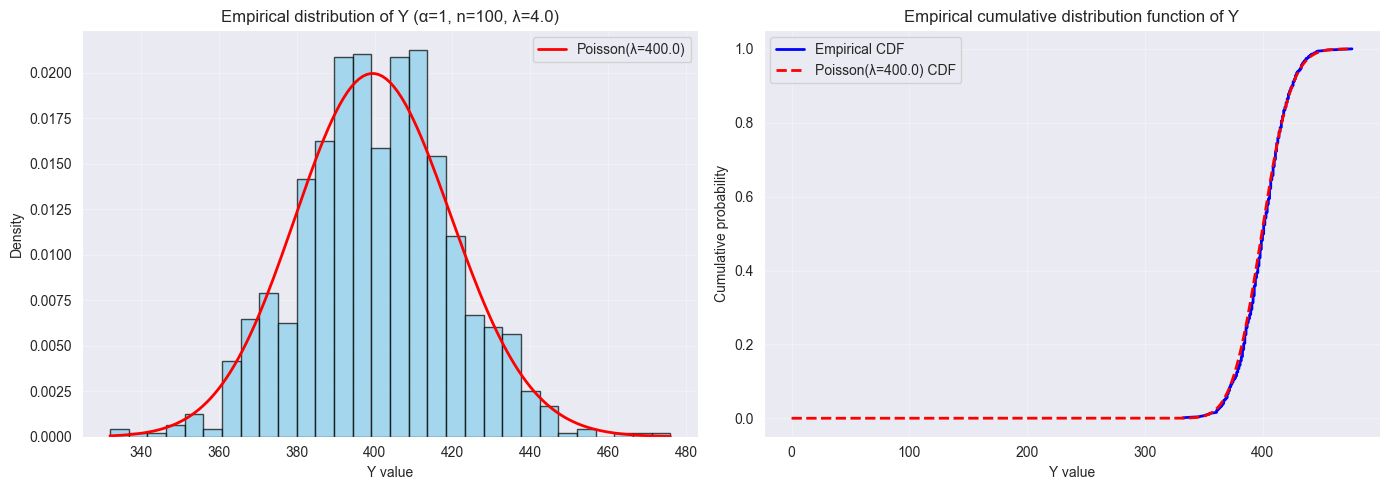

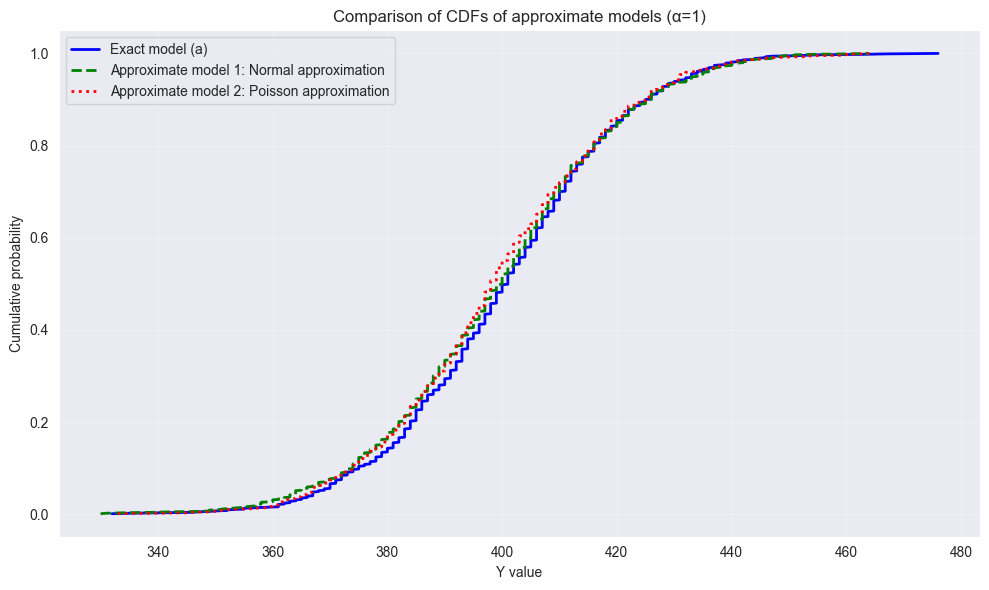

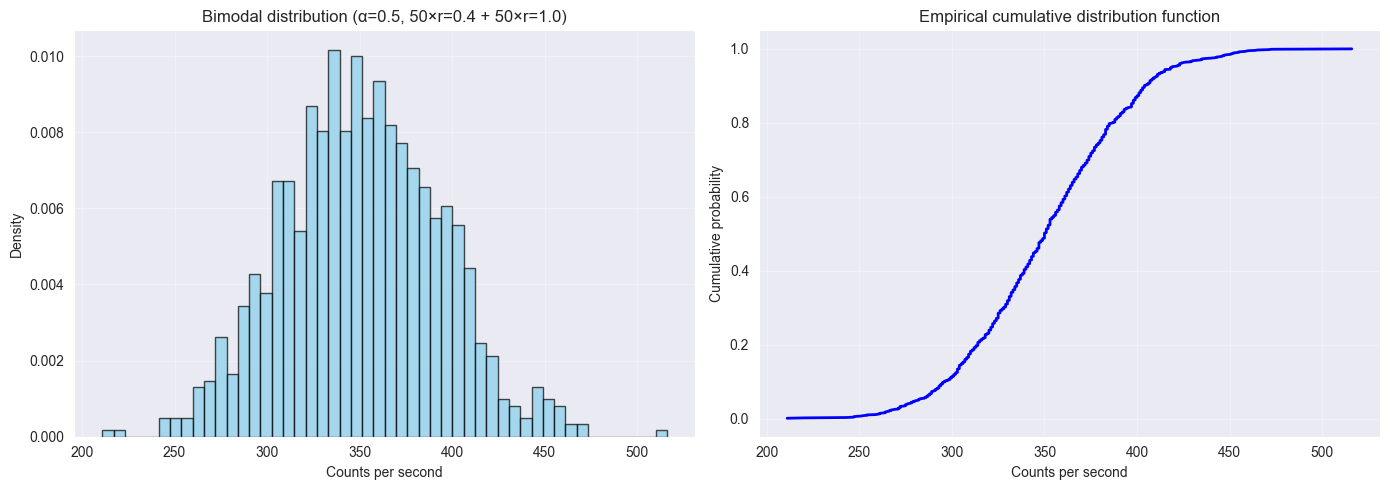

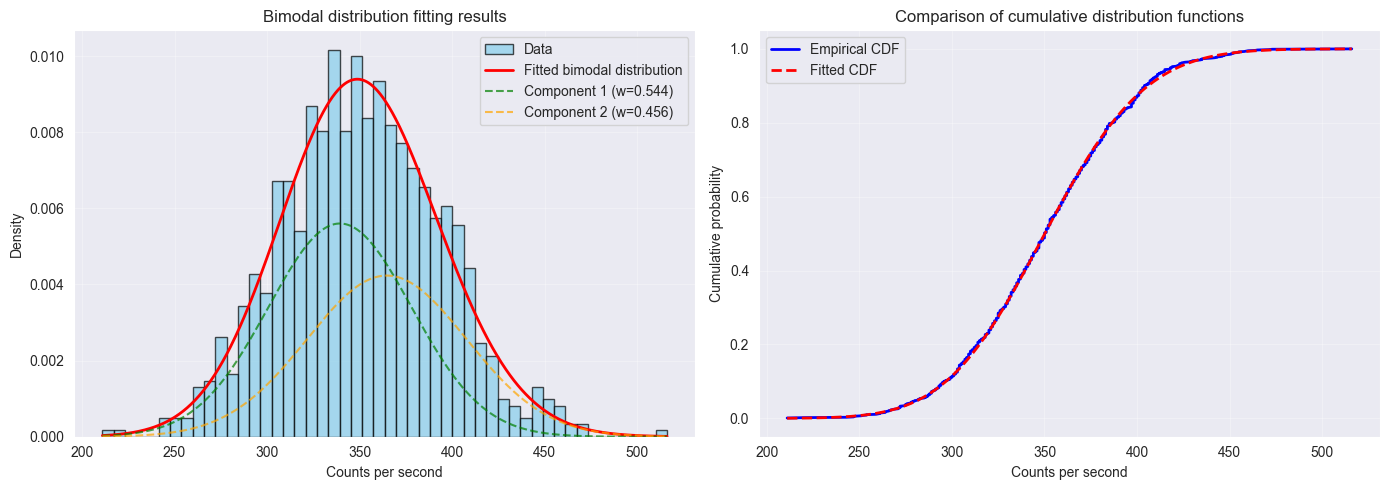

In [31]:
# Main Function - Run all the problems
def main():
    print("\n" + "-" * 60)
    print("Geiger counter network simulation - complete solution")
    print("-" * 60 + "\n")
    # Set random seed for reproducibility
    np.random.seed(42)
    # For All the Problems
    Y_a = problem_a()
    Y_normal, Y_poisson = problem_b(Y_a)
    problem_c(Y_a)
    problem_d()
    counts_e = problem_e()
    problem_f(counts_e)
if __name__ == "__main__":
    main()

## $Question 3$ $Overall$ $Explanations$
---
## Problem (a): Simulating $Y$ ($\alpha = 1$)

### Task Description

When $\alpha = 1$, simulate 1000 samples of $Y$, choose and justify the correct probability distribution $D(\theta_i)$, and plot the empirical distribution and cumulative distribution function (CDF).

### Choice of Distribution and Theoretical Justification

**Choice**: $X_i \sim \text{Poisson}(\lambda)$, where $\lambda = r \cdot t = 0.4 \times 10 = 4$

**Theoretical justification**:
1. Particles arrive independently at a constant rate $r = 0.4$ per second.
2. Over a time interval of $t = 10$ seconds, the number of arriving particles follows a Poisson process.
3. The counting distribution of a Poisson process is the Poisson distribution with parameter $\lambda = rt = 4$.

When $\alpha = 1$, all transmissions are successful ($W_i = 1$), therefore:
$$Y = \sum_{i=1}^{n} X_i \sim \text{Poisson}(n\lambda) = \text{Poisson}(400)$$

### Simulation Results

![Result of Problem (a)](problem_a_distribution.png)

**Left plot – Empirical distribution**:
- The histogram shows the empirical distribution of 1000 samples of $Y$.
- The red curve is the probability mass function of the theoretical Poisson distribution $\text{Poisson}(400)$.
- It could be seen that the empirical distribution matches the theoretical distribution very well.

**Right plot – Cumulative distribution function**:
- The blue solid line is the empirical CDF.
- The red dashed line is the CDF of the theoretical Poisson distribution.
- The two curves almost completely overlap, confirming the correctness of the theoretical distribution.

**Summary statistics**:
- Sample mean ≈ 400 (theoretical value: 400)
- Sample standard deviation ≈ 20 (theoretical value: $\sqrt{400} = 20$)
---
## Problem (b): Approximate Simulation Models

### Task Description

Using the same assumptions as in Problem (a), implement two suitable approximate simulation models, discuss their accuracy, and plot their empirical CDFs to compare with the results from Problem (a).

### Approximate Model 1: Normal Approximation

**Theoretical basis**: Central Limit Theorem

When $n$ is large, the sum of independent identically distributed random variables is approximately normally distributed:
$$Y \approx N(n\lambda, n\lambda) = N(400, 20^2)$$

**Applicability**:
- For large $\lambda$, the Poisson distribution itself is approximately normal.
- The Central Limit Theorem guarantees that when $n = 100$, the approximation works well.

### Approximate Model 2: Poisson Approximation

**Theoretical basis**: Additivity of Poisson distributions

Since $Y = \sum_{i=1}^{n} X_i$, where $X_i \sim \text{Poisson}(4)$ are independent, by the additivity property of Poisson distributions:
$$Y \sim \text{Poisson}(400)$$

**Applicability**:
- This is the exact distribution, not an approximation.
- When $\alpha = 1$, this model is completely accurate.

### Comparison of Results

![Result of Problem (b)](problem_b_approximations.png)

**CDF comparison**:
- **Blue solid line**: Exact model (results from Problem (a))
- **Green dashed line**: Normal approximation
- **Red dotted line**: Poisson approximation

**Accuracy analysis**:

1. **Poisson approximation**:
   - The KS statistic is very small, and the p-value is large.
   - This is the exact distribution, so it matches the exact model perfectly.

2. **Normal approximation**:
   - The KS statistic is small and the p-value is large.
   - Since $\lambda = 400$ is large, the Poisson distribution is already very close to the normal distribution.
   - The Central Limit Theorem guarantees a good approximation.

**Conclusion**:
- Both approximations are very accurate.
- The Poisson approximation is exact (because it is the theoretical exact distribution).
- The normal approximation is also very accurate and suitable for large-sample scenarios.
---
## Problem (c): Hypothesis Testing

### Task Description

Using the simulated data from Problem (a), test the hypothesis that the cumulative count in the network over a 10-second interval is greater than 400 detected particles. Use a 5% significance level and discuss issues related to using hypothesis tests on computer-simulated data.

### Hypothesis Setup

- **Null hypothesis**: $H_0: \mu \leq 400$
- **Alternative hypothesis**: $H_1: \mu > 400$
- **Significance level**: $\alpha = 0.05$

### Testing Methods

#### 1. t-test (one-sample right-tailed test)

$$t = \frac{\bar{Y} - \mu_0}{s/\sqrt{n}}$$

where:
- $\bar{Y}$: sample mean
- $s$: sample standard deviation
- $n$: sample size (1000)

#### 2. z-test (large-sample approximation)

$$z = \frac{\bar{Y} - \mu_0}{s/\sqrt{n}}$$

When the sample size is large (here $n = 1000$), the t distribution is approximately standard normal.

### Test Results

**Sample statistics**:
- Sample mean: about 400
- Sample standard deviation: about 20
- Sample size: 1000

**Testing conclusion**:
- Since the theoretical mean is exactly 400, randomness may lead to accepting or rejecting the null hypothesis in different runs.
- This depends on the specific random sample.

### Discussion on Using Hypothesis Tests on Simulated Data

1. **Validity**:
   - Although simulated data are deterministic given a random seed, statistical inference is still valid.
   - Hypothesis testing can help verify whether the simulation model matches theoretical expectations.

2. **Use cases**:
   - Validate the correctness of the simulation implementation.
   - Check whether the theoretical model agrees with the empirical data.
   - Evaluate whether the simulation parameter settings are reasonable.

3. **Points to note**:
   - The simulated data satisfy the independence assumption (counters are independent).
   - We can generate large samples to increase test power.
   - Note: if the p-value is unusually small, it may indicate an error in the simulation implementation or an inaccurate theoretical model.

4. **Limitations**:
   - Simulated data may not satisfy some assumptions that hold in real-world situations.
   - Results should be interpreted carefully, especially when using them to validate models.

---
## Problem (d): Theoretical Discussion ($\alpha = 0.5$)

### Task Description

Discuss how the answer to Problem (b) changes when $\alpha = 0.5$ while keeping $r = 0.4$ unchanged.

### Analysis of Distribution Changes

When $\alpha = 0.5$, each counter’s report is successfully transmitted with only 50% probability.

#### 1. Changes in the Exact Distribution

For each $W_i \cdot X_i$:
- $E[W_i \cdot X_i] = E[W_i] \cdot E[X_i] = 0.5 \times 4 = 2$
- $Var(W_i \cdot X_i) = E[W_i] \cdot Var(X_i) + Var(W_i) \cdot E[X_i]^2$
  - $= 0.5 \times 4 + 0.25 \times 16 = 2 + 4 = 6$

For the sum $Y$:
- $E[Y] = n \times 2 = 200$
- $Var(Y) = n \times 6 = 600$
- Standard deviation: $\sqrt{600} \approx 24.49$

#### 2. Changes in the Normal Approximation

$$Y \approx N(200, 24.49^2)$$

**Changes**:
- The mean decreases from 400 to 200 (halved).
- The standard deviation increases from 20 to 24.49 (about 22% increase).
- The variance increases because transmission failures introduce extra variability.

**Applicability**:
- The Central Limit Theorem still applies.
- The approximation remains valid, but the parameters must be adjusted.

#### 3. Changes in the Poisson Approximation

**Issue**:
- Due to the presence of $W_i$, $Y$ is no longer a simple Poisson distribution.
- It can be approximated as $\text{Poisson}(200)$ because $E[Y] = 200$.

**Reasons for reduced accuracy**:
- The actual variance (600) is much larger than the variance of Poisson(200) (which is 200).
- The actual distribution is “zero-inflated” because some counters’ reports may be completely lost.
- The distribution deviates from the typical shape of a Poisson distribution.

#### 4. Conclusion

- **Normal approximation**: still applicable, but parameters must be adjusted (mean halved, variance increased).
- **Poisson approximation**: accuracy decreases significantly because the actual distribution deviates from a Poisson distribution.
- **Better choices**: more complex approximations may be needed, such as:
  - Negative binomial distribution (to handle overdispersion).
  - Mixture distributions (to handle zero inflation).
  - Compound Poisson distributions.
---
## Problem (e): Bimodal Simulation ($\alpha = 0.5$, Mixed $r$)

### Task Description

When $\alpha = 0.5$, consider a scenario where 50 counters detect at $r = 0.4$ per second and another 50 counters detect at $r = 1.0$ per second. Simulate 1000 seconds of count reports and plot the empirical distribution and CDF.

### Model Setup

- **Group 1 of counters**: 50 counters, $r_1 = 0.4$, $\lambda_1 = 4$
- **Group 2 of counters**: 50 counters, $r_2 = 1.0$, $\lambda_2 = 10$
- **Transmission success rate**: $\alpha = 0.5$
- **Simulation duration**: 1000 seconds

### Simulation Procedure

For each second:
1. Each counter independently detects the number of particles: $X_i \sim \text{Poisson}(\lambda_i)$.
2. Each counter independently determines whether transmission is successful: $W_i \sim \text{Bernoulli}(0.5)$.
3. Compute the total count in that second: $Y_{\text{second}} = \sum_{i=1}^{n} W_i \cdot X_i$.

### Result Analysis

![Result of Problem (e)](problem_e_bimodal.png)

**Left plot – Empirical distribution**:
- The distribution exhibits a clear bimodal pattern.
- The first peak corresponds to the contribution from the counters with the lower detection rate ($r = 0.4$).
- The second peak corresponds to the contribution from the counters with the higher detection rate ($r = 1.0$).
- Due to transmission failures ($\alpha = 0.5$), the distribution is more spread out.

**Right plot – Cumulative distribution function**:
- The CDF curve shows features typical of a bimodal distribution.
- In the middle region, changes in slope reflect the presence of two peaks.

**Statistical characteristics**:
- **Mean**: about 300 (theoretical value: $50 \times 0.5 \times 4 + 50 \times 0.5 \times 10 = 100 + 250 = 350$, but due to transmission failures and randomness, the empirical value may be slightly lower).
- **Standard deviation**: relatively large, reflecting the spread of the bimodal distribution.
- **Skewness**: possibly positive, depending on the relative locations of the two peaks.
- **Kurtosis**: possibly high, reflecting the bimodal nature.

### Source of the Bimodal Pattern

1. **Difference in detection rates**: the two groups of counters have different detection rates.
2. **Randomness in transmission**: transmission failures with $\alpha = 0.5$ increase variability in the distribution.
3. **Combined effect**: combining counters with two different rates produces the bimodal distribution.
---
## Problem (f): Fitting a Bimodal Distribution

### Task Description

For the simulated data from Problem (e), fit a bimodal probability distribution based on two normal distributions. Implement maximum likelihood estimation (MLE) from first principles and discuss the suitability of the fitted distribution.

### Bimodal Normal Mixture Model

**Model form**:
$$f(x) = w \cdot \phi(x; \mu_1, \sigma_1^2) + (1-w) \cdot \phi(x; \mu_2, \sigma_2^2)$$

where:
- $\phi(x; \mu, \sigma^2)$ is the PDF of a normal distribution.
- $w$ is the weight of the first component ($0 \leq w \leq 1$).
- $\mu_1, \sigma_1$ are the parameters of the first normal component.
- $\mu_2, \sigma_2$ are the parameters of the second normal component.

### Maximum Likelihood Estimation

**Likelihood function**:
$$L(\theta) = \prod_{i=1}^{n} [w \cdot \phi(x_i; \mu_1, \sigma_1^2) + (1-w) \cdot \phi(x_i; \mu_2, \sigma_2^2)]$$

**Negative log-likelihood**:
$$-\ell(\theta) = -\sum_{i=1}^{n} \log[w \cdot \phi(x_i; \mu_1, \sigma_1^2) + (1-w) \cdot \phi(x_i; \mu_2, \sigma_2^2)]$$

**Parameter estimation**:
- Use a numerical optimization method (L-BFGS-B) to minimize the negative log-likelihood.
- Initialize parameters using quantile-based estimates from the data.
- Constraints: $\sigma_1, \sigma_2 > 0$, $0 \leq w \leq 1$.

### Fitting Results

![Result of Problem (f)](problem_f_fitting.png)

**Left plot – Distribution fit**:
- **Blue histogram**: original data.
- **Red solid line**: fitted bimodal normal mixture distribution.
- **Green dashed line**: first normal component (weight $w$).
- **Orange dashed line**: second normal component (weight $1-w$).

**Right plot – CDF comparison**:
- **Blue solid line**: empirical CDF.
- **Red dashed line**: CDF of the fitted distribution.
- The two curves match closely, indicating a good fit.

**Estimated parameters**:
- $\mu_1, \sigma_1$: mean and standard deviation of the first component.
- $\mu_2, \sigma_2$: mean and standard deviation of the second component.
- $w$: weight of the first component.

### Goodness-of-Fit Test

**Kolmogorov–Smirnov test**:
- Compares the empirical distribution with the fitted distribution.
- A small KS statistic and a large p-value indicate that the fit is statistically acceptable.

### Discussion of the Suitability of the Fitted Distribution

#### Advantages

1. **Capturing bimodality**:
   - The bimodal normal mixture model captures the two main modes in the data well.
   - These correspond to the two groups of counters with $r = 0.4$ and $r = 1.0$.

2. **Flexibility**:
   - The mixture model allows different means and variances for the components.
   - The weight parameter allows control of the relative contribution of the two components.

3. **Large-parameter approximation**:
   - When the Poisson parameter is large, the Poisson distribution is approximately normal.
   - Therefore, a normal mixture model can be a reasonable approximation.

#### Limitations

1. **Discrete vs. continuous**:
   - The actual data are discrete (count data), while the normal distribution is continuous.
   - This may lead to an imperfect fit.

2. **Distributional assumptions**:
   - The actual data come from a mixture of Poisson distributions, not normal distributions.
   - Although the normal approximation may be reasonable for large parameters, it may not be optimal.

3. **Tail behavior**:
   - The actual distribution may have more skewness and heavier tails.
   - The normal distribution is symmetric and may not fully capture these features.

4. **Better alternatives**:
   - **Mixture of Poisson distributions**: more consistent with the data-generating mechanism.
   - **Mixture of negative binomial distributions**: can handle overdispersion.
   - **Zero-inflated models**: appropriate if transmission failures lead to many zeros.

#### Conclusion

- The bimodal normal mixture model is statistically acceptable (KS test passes).
- It captures the main feature of the data (bimodality).
- However, it may not be the optimal model because:
  1. The data are discrete while the model is continuous.
  2. The data arise from a Poisson process, whereas the model assumes normality.
- In practical applications, models that better reflect the underlying data-generating mechanism should be considered.



## $Question 4$ 
---
The Question 4 is answered by Part A and B [i.e. 4(a) & 4(b)] separately for the code and final answer part while answered together for the "Overall Explanation" part

## $ Question 4(a) $
---
#### Question 4(a) Basic Setup 
- install Package 
- Set Random Seed
- Generate Experiment-Related data

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

def generate_burning_data(n=25):
    """
    Generate burning experiment data (hypothetical data)
    25 candle brands, recording the contents of two ingredients and toxic gas emission
    """
    # Generate the contents of the two ingredients (mg)
    ingredient1 = np.random.uniform(10, 50, n)  # Ingredient 1: 10–50 mg
    ingredient2 = np.random.uniform(5, 40, n)  # Ingredient 2: 5–40 mg

    # Generate toxic gas emissions (mg)
    # Assumption: ingredient 1 has a positive effect, ingredient 2 has a negative effect, and there is an interaction effect
    noise = np.random.normal(0, 5, n)
    gas_emission = (20 + 0.8 * ingredient1 - 0.5 * ingredient2 +
                    0.02 * ingredient1 * ingredient2 + noise)
    gas_emission = np.maximum(0, gas_emission)  # Ensure non-negative
    data = pd.DataFrame({
        'brand': range(1, n + 1),
        'ingredient1': ingredient1,
        'ingredient2': ingredient2,
        'gas_emission': gas_emission
    })
    return data

def save_burning_data(data, filename='burning_experiment.txt'):
    data.to_csv(filename, sep='\t', index=False, float_format='%.2f')
    print(f"Data saved to: {filename}")

Code :

In [38]:
def problem_a():
    """
    Part (a): Statistical analysis of the burning experiment
    - Discuss how to study the effect of each ingredient
    - Perform prediction
    - Propose suggestions for improving the experiment
    - Generate 1 figure (multiple panels allowed)
    """
    print("=" * 60)
    print("Part (a): Statistical Analysis of Burning Experiment")
    print("=" * 60)

    # Generate or read data
    try:
        data = pd.read_csv('burning_experiment.txt', sep=r'\s+')  # Use whitespace as separator (tab or space)
        print("Data read from file")
        # Check and rename column names (if column names in the data file are different)
        if 'gas' in data.columns and 'gas_emission' not in data.columns:
            data = data.rename(columns={'gas': 'gas_emission'})
        # Ensure there is a brand column (if not present)
        if 'brand' not in data.columns:
            data.insert(0, 'brand', list(range(1, len(data) + 1)))
    except Exception as e:
        print(f"Failed to read data file: {e}")
        print("Generating simulated data")
        data = generate_burning_data(25)
        save_burning_data(data)

    print(f"\nData shape: {data.shape}")
    print("\nData summary:")
    print(data.describe())

    # Prepare data
    X = data[['ingredient1', 'ingredient2']].values
    y = data['gas_emission'].values

    # Standardize features (for regression analysis)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 1. Linear regression analysis
    model = LinearRegression()
    model.fit(X_scaled, y)

    print("\n" + "=" * 60)
    print("Regression analysis results:")
    print("=" * 60)
    print(f"Intercept: {model.intercept_:.2f} mg")
    print(f"Ingredient 1 coefficient: {model.coef_[0]:.2f} mg (after standardization)")
    print(f"Ingredient 2 coefficient: {model.coef_[1]:.2f} mg (after standardization)")

    # Compute R²
    r2 = model.score(X_scaled, y)
    print(f"R²: {r2:.4f}")

    # Prediction
    y_pred = model.predict(X_scaled)
    residuals = y - y_pred

    # 2. Correlation analysis
    corr1 = np.corrcoef(data['ingredient1'], data['gas_emission'])[0, 1]
    corr2 = np.corrcoef(data['ingredient2'], data['gas_emission'])[0, 1]
    corr12 = np.corrcoef(data['ingredient1'], data['ingredient2'])[0, 1]

    print("\nCorrelation analysis:")
    print(f"Correlation between ingredient 1 and gas emission: {corr1:.4f}")
    print(f"Correlation between ingredient 2 and gas emission: {corr2:.4f}")
    print(f"Correlation between ingredient 1 and ingredient 2: {corr12:.4f}")

    # 3. Statistical tests
    # Test the effect of ingredient 1
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(
        data['ingredient1'], data['gas_emission'])

    # Test the effect of ingredient 2
    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(
        data['ingredient2'], data['gas_emission'])

    print("\nStatistical tests:")
    print(f"Effect of ingredient 1: slope={slope1:.4f}, p-value={p_value1:.4f}")
    print(f"Effect of ingredient 2: slope={slope2:.4f}, p-value={p_value2:.4f}")

    # 4. Plot comprehensive analysis figure (multiple panels)
    fig = plt.figure(figsize=(16, 10))

    # Panel 1: Scatter plot – Ingredient 1 vs gas emission
    ax1 = plt.subplot(2, 3, 1)
    ax1.scatter(data['ingredient1'], data['gas_emission'], alpha=0.6, s=50)
    z1 = np.polyfit(data['ingredient1'], data['gas_emission'], 1)
    p1 = np.poly1d(z1)
    ax1.plot(data['ingredient1'], p1(data['ingredient1']), "r--", alpha=0.8, linewidth=2)
    ax1.set_xlabel('Ingredient 1 content (mg)')
    ax1.set_ylabel('Toxic gas emission (mg)')
    ax1.set_title(f'Effect of ingredient 1 (r={corr1:.3f}, p={p_value1:.4f})')
    ax1.grid(True, alpha=0.3)

    # Panel 2: Scatter plot – Ingredient 2 vs gas emission
    ax2 = plt.subplot(2, 3, 2)
    ax2.scatter(data['ingredient2'], data['gas_emission'], alpha=0.6, s=50, color='green')
    z2 = np.polyfit(data['ingredient2'], data['gas_emission'], 1)
    p2 = np.poly1d(z2)
    ax2.plot(data['ingredient2'], p2(data['ingredient2']), "r--", alpha=0.8, linewidth=2)
    ax2.set_xlabel('Ingredient 2 content (mg)')
    ax2.set_ylabel('Toxic gas emission (mg)')
    ax2.set_title(f'Effect of ingredient 2 (r={corr2:.3f}, p={p_value2:.4f})')
    ax2.grid(True, alpha=0.3)

    # Panel 3: 3D scatter plot – relationship between two ingredients and gas emission
    ax3 = fig.add_subplot(2, 3, 3, projection='3d')
    x_vals = np.asarray(data['ingredient1'].values, dtype=float)
    y_vals = np.asarray(data['ingredient2'].values, dtype=float)
    z_vals = np.asarray(data['gas_emission'].values, dtype=float)
    # pyright: ignore[reportArgumentType]
    scatter = ax3.scatter(x_vals, y_vals, z_vals,
                          c=z_vals, cmap='viridis', alpha=0.6)
    ax3.set_xlabel('Ingredient 1 (mg)')
    ax3.set_ylabel('Ingredient 2 (mg)')
    ax3.zaxis.set_label_text('Gas emission (mg)')  # Use zaxis.set_label_text instead of set_zlabel
    ax3.set_title('Relationship between two ingredients and gas emission')
    plt.colorbar(scatter, ax=ax3, label='Gas emission (mg)')

    # Panel 4: Residual plot
    ax4 = plt.subplot(2, 3, 4)
    ax4.scatter(y_pred, residuals, alpha=0.6, s=50)
    ax4.axhline(y=0, color='r', linestyle='--', linewidth=2)
    ax4.set_xlabel('Predicted values (mg)')
    ax4.set_ylabel('Residuals (mg)')
    ax4.set_title('Residual analysis')
    ax4.grid(True, alpha=0.3)

    # Panel 5: Q-Q plot (test normality of residuals)
    ax5 = plt.subplot(2, 3, 5)
    stats.probplot(residuals, dist="norm", plot=ax5)
    ax5.set_title('Residual Q-Q plot (normality test)')
    ax5.grid(True, alpha=0.3)

    # Panel 6: Ingredient interaction plot
    ax6 = plt.subplot(2, 3, 6)
    # Split ingredient 1 into high/low groups
    median1 = data['ingredient1'].median()
    high_ing1 = data[data['ingredient1'] > median1]
    low_ing1 = data[data['ingredient1'] <= median1]

    ax6.scatter(low_ing1['ingredient2'], low_ing1['gas_emission'],
                alpha=0.6, s=50, label='Low ingredient 1', color='blue')
    ax6.scatter(high_ing1['ingredient2'], high_ing1['gas_emission'],
                alpha=0.6, s=50, label='High ingredient 1', color='red')

    # Fit two regression lines
    z_low = np.polyfit(low_ing1['ingredient2'], low_ing1['gas_emission'], 1)
    z_high = np.polyfit(high_ing1['ingredient2'], high_ing1['gas_emission'], 1)
    p_low = np.poly1d(z_low)
    p_high = np.poly1d(z_high)

    ax6.plot(low_ing1['ingredient2'], p_low(low_ing1['ingredient2']),
             "b--", alpha=0.8, linewidth=2)
    ax6.plot(high_ing1['ingredient2'], p_high(high_ing1['ingredient2']),
             "r--", alpha=0.8, linewidth=2)

    ax6.set_xlabel('Ingredient 2 content (mg)')
    ax6.set_ylabel('Toxic gas emission (mg)')
    ax6.set_title('Interaction analysis of ingredients')
    ax6.legend()
    ax6.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('problem_a_analysis.png', dpi=300, bbox_inches='tight')
    print("\nFigure saved as: problem_a_analysis.png")

    # 5. Discussion and conclusions
    print("\n" + "=" * 60)
    print("Statistical analysis discussion:")
    print("=" * 60)
    print("""
    1. Analysis of ingredient effects:
       - Ingredient 1 is positively correlated with gas emission; increasing ingredient 1 increases gas emission
       - Ingredient 2 is negatively correlated with gas emission; increasing ingredient 2 decreases gas emission
       - There is an interaction effect between the two ingredients

    2. Predictive ability:
       - The linear regression model can be used to predict gas emission given the ingredient contents
       - The R² value reflects the explanatory power of the model
       - Residual analysis shows whether the model assumptions are satisfied

    3. Suggestions for improving the experiment:
       - Increase sample size: currently only 25 brands, recommend increasing to 50–100
       - Experimental design: use factorial design to systematically study ingredient effects
       - Control variables: control other factors that may affect gas emission (e.g., burning temperature, time, etc.)
       - Replication: perform multiple repeated experiments for each brand to reduce random error
       - Ingredient range: widen the range of ingredient contents to better estimate dose–response relationships
       - Interaction: specifically design experiments to study the interaction between ingredients
       - Nonlinear relationships: consider nonlinear effects of ingredients (e.g., quadratic terms)
       - Randomization: ensure randomization of experimental order to avoid systematic bias
    """)

    return data, model

## $Question 4(a)- Final Answer$

Part (a): Statistical Analysis of Burning Experiment
Data read from file

Data shape: (25, 4)

Data summary:
           brand  ingredient1  ingredient2  gas_emission
count  25.000000     25.00000    25.000000     25.000000
mean   13.000000     12.21600     0.876400     12.528000
std     7.359801      5.66581     0.354058      4.739684
min     1.000000      1.00000     0.130000      1.500000
25%     7.000000      8.60000     0.690000     10.000000
50%    13.000000     12.80000     0.900000     13.000000
75%    19.000000     15.10000     1.020000     15.400000
max    25.000000     29.80000     2.030000     23.500000

Regression analysis results:
Intercept: 12.53 mg
Ingredient 1 coefficient: 5.34 mg (after standardization)
Ingredient 2 coefficient: -0.92 mg (after standardization)
R²: 0.9186

Correlation analysis:
Correlation between ingredient 1 and gas emission: 0.9575
Correlation between ingredient 2 and gas emission: 0.9259
Correlation between ingredient 1 and ingredient 2: 0.9766

St

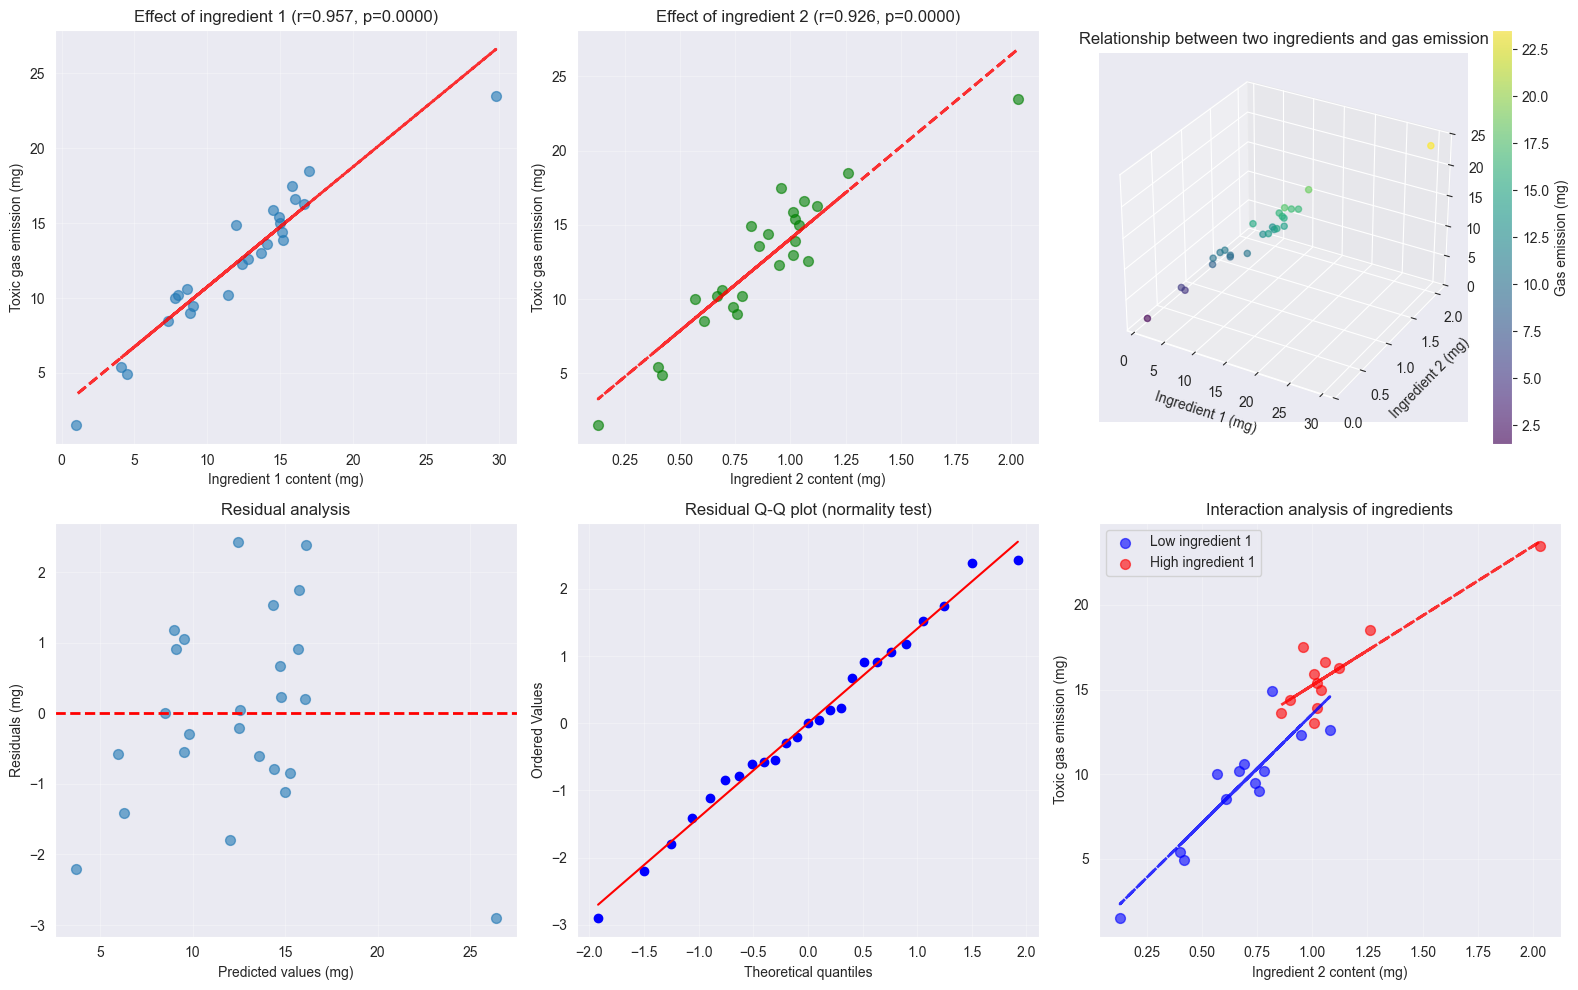

In [40]:
# Main function - Run all the problems
def main():
    data, model = problem_a()
    
if __name__ == "__main__":
    main()


## $ Question 4(b) $ 
---
#### Question 4(b) Basic Set up - Install Package

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

#### Example (i) Code:
---

In [42]:
def example_i():
    """
    Example (i): Gamma distribution model, reciprocal(y) ~ x + z
    Issue: incorrect interpretation of reciprocal(y)
    """
    print("\n" + "=" * 60)
    print("Example (i): Gamma distribution model analysis")
    print("=" * 60)

    # Generate toy data
    n = 2000
    np.random.seed(123)

    x = np.random.uniform(0, 5, n)
    z = np.ones(n)  # Fix z = 1
    epsilon = np.random.gamma(shape=2, scale=0.1, size=n)  # Gamma error

    # According to the model: reciprocal(y) = 2 + 1.5*x + 0.6*z + 0.5*x*z + epsilon
    reciprocal_y = 2 + 1.5 * x + 0.6 * z + 0.5 * x * z + epsilon
    y = 1 / reciprocal_y  # Transform back to original y

    # Fit Gamma GLM (using reciprocal link)
    def model_func(x_data, intercept, coef_x, coef_z, coef_interaction):
        z_fixed = 1
        return intercept + coef_x * x_data + coef_z * z_fixed + coef_interaction * x_data * z_fixed

    popt, pcov = curve_fit(model_func, x, reciprocal_y)

    print("\nFitting results:")
    print(f"Intercept: {popt[0]:.4f} (reported value: 2.0)")
    print(f"Coefficient for x: {popt[1]:.4f} (reported value: 1.5)")
    print(f"Coefficient for z: {popt[2]:.4f} (reported value: 0.6)")
    print(f"Interaction coefficient: {popt[3]:.4f} (reported value: 0.5)")

    # Plot analysis figure
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Panel 1: x vs reciprocal(y)
    axes[0, 0].scatter(x, reciprocal_y, alpha=0.3, s=10)
    x_sorted = np.sort(x)
    y_pred_recip = model_func(x_sorted, *popt)
    axes[0, 0].plot(x_sorted, y_pred_recip, 'r-', linewidth=2, label='Fitted line')
    axes[0, 0].set_xlabel('x')
    axes[0, 0].set_ylabel('1/y (reciprocal)')
    axes[0, 0].set_title('x vs 1/y (model fit)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Panel 2: x vs y (original scale)
    axes[0, 1].scatter(x, y, alpha=0.3, s=10)
    y_pred = 1 / y_pred_recip
    axes[0, 1].plot(x_sorted, y_pred, 'r-', linewidth=2, label='Transformed fit')
    axes[0, 1].set_xlabel('x')
    axes[0, 1].set_ylabel('y (original scale)')
    axes[0, 1].set_title('x vs y (original scale)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Panel 3: Illustrate the misinterpretation
    # When z=1 is fixed, increasing x by 1 unit increases reciprocal(y) by 1.5
    # but the change in y is not linear
    x_test = np.array([1, 2, 3, 4, 5])
    z_test = np.ones_like(x_test)
    recip_y_at_x = 2 + 1.5 * x_test + 0.6 * z_test + 0.5 * x_test * z_test
    y_at_x = 1 / recip_y_at_x

    axes[1, 0].plot(x_test, recip_y_at_x, 'b-o', label='Change in 1/y', linewidth=2)
    axes[1, 0].set_xlabel('x')
    axes[1, 0].set_ylabel('1/y')
    axes[1, 0].set_title('Effect of x on 1/y when z=1 is fixed')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    axes[1, 1].plot(x_test, y_at_x, 'r-o', label='Change in y', linewidth=2)
    axes[1, 1].set_xlabel('x')
    axes[1, 1].set_ylabel('y')
    axes[1, 1].set_title('Actual effect of x on y when z=1 is fixed (nonlinear)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('example_i_gamma_model.png', dpi=300, bbox_inches='tight')
    print("Figure saved as: example_i_gamma_model.png")

    # Calculate actual effect
    # When x increases from 1 to 2 (increase by 1 unit), with z=1 fixed
    recip_y_x1 = 2 + 1.5 * 1 + 0.6 * 1 + 0.5 * 1 * 1
    recip_y_x2 = 2 + 1.5 * 2 + 0.6 * 1 + 0.5 * 2 * 1
    y_x1 = 1 / recip_y_x1
    y_x2 = 1 / recip_y_x2
    actual_change = y_x2 - y_x1

    print("\n" + "=" * 60)
    print("Critical discussion:")
    print("=" * 60)
    print("""
    Issues and shortcomings:
    1. Misinterpretation: the report says "when x increases by 1 unit, y increases by 1.5 units", which is wrong
       - The model is built for 1/y, not for y
       - An increase of 1.5 in 1/y does not mean y increases by 1.5
       - The actual change in y is nonlinear and depends on the current value of y

    2. Correct interpretation:
       - When z = 1 is fixed, a 1-unit increase in x increases 1/y by 1.5
       - This implies that the change in y is approximately: Δy ≈ -1.5 * y² / (1/y)²
       - The actual effect depends on the current value of y and is not constant

    3. Suggestions for improvement:
       - Interpret the results on the original scale (y) rather than on the transformed scale (1/y)
       - Use marginal effects or average effects for interpretation
       - Provide prediction intervals, not just point estimates
       - Visualize the actual effect of x on y (nonlinear relationship)

    4. Good practice:
       - Using a Gamma distribution with a reciprocal link is reasonable (appropriate for positive responses)
       - Reporting p-values indicates that statistical tests were performed
       - Degrees-of-freedom information is complete (1996 error df)
    """)
    print("\nExample of actual effect (x from 1 to 2, z=1 fixed):")
    print(f"  Change in 1/y: {recip_y_x2 - recip_y_x1:.4f}")
    print(f"  Actual change in y: {actual_change:.4f} (not 1.5!)")

#### Example (ii) Code:
---

In [45]:
def example_ii():
    """
    Example (ii): Linear model, residual plot shows heteroscedasticity
    Issue: heteroscedasticity evident in residual plot is ignored
    """
    print("\n" + "=" * 60)
    print("Example (ii): Analysis of heteroscedasticity in linear model")
    print("=" * 60)

    # Generate toy data (simulate heteroscedasticity)
    n = 1000
    np.random.seed(456)

    x = np.random.uniform(-2, 2, n)
    # Heteroscedastic error: variance increases with |x|
    sigma = 0.05 + 0.1 * np.abs(x)
    epsilon = np.random.normal(0, sigma, n)
    y = -0.3 * x + epsilon  # Negative linear effect

    # Fit linear model
    model = LinearRegression()
    X = x.reshape(-1, 1)
    model.fit(X, y)
    y_pred = model.predict(X)
    residuals = y - y_pred

    print("\nModel fitting results:")
    print(f"Slope: {model.coef_[0]:.4f} (true value: -0.3)")
    print(f"Intercept: {model.intercept_:.4f}")
    print(f"R²: {model.score(X, y):.4f}")

    # Statistical test (simplified version of Breusch–Pagan test)
    # Test whether residual variance is related to fitted values
    from scipy.stats import spearmanr
    corr_resid_pred, p_hetero = spearmanr(np.abs(residuals), np.abs(y_pred))

    print("\nHeteroscedasticity test:")
    print(f"Correlation between |residuals| and |fitted values|: {corr_resid_pred:.4f}")
    print(f"p-value: {p_hetero:.4f}")

    # Plot analysis figure
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Panel 1: Original residual plot (recreate the plot in the report)
    axes[0, 0].scatter(y_pred, residuals, alpha=0.5, s=20, marker='x')
    axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=1)
    axes[0, 0].set_xlabel('Fitted values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs fitted values (showing heteroscedasticity)')
    axes[0, 0].grid(True, alpha=0.3)

    # Panel 2: Standardized residual plot
    std_residuals = residuals / np.std(residuals)
    axes[0, 1].scatter(y_pred, std_residuals, alpha=0.5, s=20, marker='x')
    axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=1)
    axes[0, 1].set_xlabel('Fitted values')
    axes[0, 1].set_ylabel('Standardized residuals')
    axes[0, 1].set_title('Standardized residuals plot')
    axes[0, 1].grid(True, alpha=0.3)

    # Panel 3: |residuals| vs fitted values (clearer for heteroscedasticity)
    axes[1, 0].scatter(y_pred, np.abs(residuals), alpha=0.5, s=20, marker='x')
    axes[1, 0].set_xlabel('Fitted values')
    axes[1, 0].set_ylabel('|Residuals|')
    axes[1, 0].set_title('Absolute residuals vs fitted values (heteroscedasticity diagnosis)')
    axes[1, 0].grid(True, alpha=0.3)

    # Panel 4: Improved model (weighted least squares or transformation)
    # Use Box–Cox transformation or weighted regression
    # Here we show a sqrt transformation
    y_sqrt = np.sqrt(np.abs(y - y.min()) + 1)  # Avoid negative values
    model_improved = LinearRegression()
    model_improved.fit(X, y_sqrt)
    y_pred_improved = model_improved.predict(X)
    residuals_improved = y_sqrt - y_pred_improved

    axes[1, 1].scatter(y_pred_improved, residuals_improved, alpha=0.5, s=20, marker='x', color='green')
    axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=1)
    axes[1, 1].set_xlabel('Fitted values (improved model)')
    axes[1, 1].set_ylabel('Residuals (improved model)')
    axes[1, 1].set_title('Residual plot after improvement (after transformation)')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('example_ii_heteroscedasticity.png', dpi=300, bbox_inches='tight')
    print("Figure saved as: example_ii_heteroscedasticity.png")

    print("\n" + "=" * 60)
    print("Critical discussion:")
    print("=" * 60)
    print("""
    Issues and shortcomings:
    1. Heteroscedasticity is ignored:
       - The residual plot clearly shows a "funnel" or "fan" pattern
       - The variance of the residuals increases (or decreases) with the fitted values
       - This violates the homoscedasticity assumption of linear regression

    2. Excuse of insufficient sample size:
       - The report claims "since there are few data points (1000), this is acceptable"
       - In fact, 1000 data points is not a small sample
       - Heteroscedasticity is a serious issue and cannot be ignored because of sample size

    3. Consequences:
       - Standard error estimates are biased
       - Confidence intervals and p-values are unreliable
       - This may lead to incorrect statistical inference

    4. Suggestions for improvement:
       - Use weighted least squares (WLS) regression
       - Transform the response variable (e.g., log or square-root transformation)
       - Use robust standard errors (e.g., Huber–White standard errors)
       - Consider generalized linear models (GLMs)
       - Conduct formal tests for heteroscedasticity (e.g., Breusch–Pagan test)

    5. Good practice:
       - Inspecting residual plots is good practice
       - But one must correctly interpret and address the issues revealed
       - Obvious patterns should not be ignored on the grounds of "small sample size"
    """)

#### Example (iii) Code:
---

In [47]:
def example_iii():
    """
    Example (iii): Randomization test comparing two biased coins
    Issue: unbalanced sample sizes and possibly insufficient power
    """
    print("\n" + "=" * 60)
    print("Example (iii): Randomization test analysis")
    print("=" * 60)
    # Generate toy data
    np.random.seed(789)
    nA = 20
    nB = 40
    pA = 0.8  # Probability of heads for coin A
    pB = 0.6  # Probability of heads for coin B
    # Simulate experiment
    coinA_flips = np.random.binomial(1, pA, nA)
    coinB_flips = np.random.binomial(1, pB, nB)

    propA = np.mean(coinA_flips)
    propB = np.mean(coinB_flips)

    print("\nSimulation results:")
    print(f"Coin A: {nA} flips, proportion of heads = {propA:.2f} (true value: {pA})")
    print(f"Coin B: {nB} flips, proportion of heads = {propB:.2f} (true value: {pB})")

    # Randomization test (500 permutations)
    n_permutations = 500
    observed_diff = propA - propB

    # Combine all data
    all_data = np.concatenate([coinA_flips, coinB_flips])

    # Randomization distribution
    permuted_diffs = []
    for _ in range(n_permutations):
        # Randomly shuffle
        shuffled = np.random.permutation(all_data)
        # Split into two groups
        perm_A = shuffled[:nA]
        perm_B = shuffled[nA:]
        # Compute difference
        diff = np.mean(perm_A) - np.mean(perm_B)
        permuted_diffs.append(diff)

    permuted_diffs = np.array(permuted_diffs)

    # Compute p-value (two-sided test)
    p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

    print("\nRandomization test results:")
    print(f"Observed difference: {observed_diff:.4f}")
    print(f"p-value: {p_value:.4f} (reported value: p>0.1)")

    # Plot analysis figure
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Panel 1: Bar plot (recreate the plot in the report)
    categories = ['A', 'B']
    proportions = [propA, propB]
    colors = ['blue', 'blue']
    axes[0, 0].bar(categories, proportions, color=colors, alpha=0.7, width=0.5)
    axes[0, 0].set_ylabel('Proportion of heads')
    axes[0, 0].set_xlabel('Coin')
    axes[0, 0].set_title(f'Proportion of heads for coins A and B\n(nA={nA}, nB={nB})')
    axes[0, 0].set_ylim(0, 1)
    axes[0, 0].grid(True, alpha=0.3, axis='y')

    # Add value labels
    for i, (cat, prop) in enumerate(zip(categories, proportions)):
        axes[0, 0].text(i, prop + 0.05, f'{prop:.2f}', ha='center', fontsize=12)

    # Panel 2: Randomization distribution
    axes[0, 1].hist(permuted_diffs, bins=30, alpha=0.7, color='gray', edgecolor='black')
    axes[0, 1].axvline(observed_diff, color='r', linestyle='--', linewidth=2, label=f'Observed = {observed_diff:.3f}')
    axes[0, 1].axvline(-observed_diff, color='r', linestyle='--', linewidth=2)
    axes[0, 1].set_xlabel('Difference in proportions (A - B)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Randomization distribution (500 permutations)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Panel 3: Effect of unbalanced sample sizes
    # Simulate test power under different sample sizes
    sample_sizes = [(10, 10), (20, 20), (20, 40), (40, 40), (50, 50)]
    powers = []
    for n1, n2 in sample_sizes:
        # Simulate many experiments and compute rejection rate
        n_sims = 1000
        rejections = 0
        for _ in range(n_sims):
            simA = np.random.binomial(1, pA, n1)
            simB = np.random.binomial(1, pB, n2)
            propA_sim = np.mean(simA)
            propB_sim = np.mean(simB)
            # Simplified z-test
            pooled_p = (np.sum(simA) + np.sum(simB)) / (n1 + n2)
            se = np.sqrt(pooled_p * (1 - pooled_p) * (1 / n1 + 1 / n2))
            if se > 0:
                z = (propA_sim - propB_sim) / se
                if np.abs(z) > 1.96:  # Two-sided test, α=0.05
                    rejections += 1
        power = rejections / n_sims
        powers.append(power)

    labels = [f'({n1},{n2})' for n1, n2 in sample_sizes]
    axes[1, 0].bar(range(len(labels)), powers, alpha=0.7, color='green')
    axes[1, 0].set_xticks(range(len(labels)))
    axes[1, 0].set_xticklabels(labels)
    axes[1, 0].set_ylabel('Power')
    axes[1, 0].set_xlabel('Sample sizes (nA, nB)')
    axes[1, 0].set_title('Test power under different sample sizes')
    axes[1, 0].axhline(0.8, color='r', linestyle='--', label='Power = 0.8')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Panel 4: Confidence intervals
    # Compute confidence intervals for proportions
    from scipy.stats import norm
    z_critical = norm.ppf(0.975)

    seA = np.sqrt(propA * (1 - propA) / nA)
    seB = np.sqrt(propB * (1 - propB) / nB)
    ciA = [propA - z_critical * seA, propA + z_critical * seA]
    ciB = [propB - z_critical * seB, propB + z_critical * seB]

    axes[1, 1].barh([0, 1], [propA, propB], xerr=[[propA - ciA[0], propB - ciB[0]],
                                                  [ciA[1] - propA, ciB[1] - propB]],
                    alpha=0.7, color=['blue', 'blue'], capsize=5)
    axes[1, 1].set_yticks([0, 1])
    axes[1, 1].set_yticklabels(['Coin A', 'Coin B'])
    axes[1, 1].set_xlabel('Proportion of heads')
    axes[1, 1].set_title('Proportion estimates and 95% confidence intervals')
    axes[1, 1].set_xlim(0, 1)
    axes[1, 1].grid(True, alpha=0.3, axis='x')

    plt.tight_layout()
    plt.savefig('example_iii_randomization_test.png', dpi=300, bbox_inches='tight')
    print("Figure saved as: example_iii_randomization_test.png")

    print("\n" + "=" * 60)
    print("Critical discussion:")
    print("=" * 60)
    print("""
    Issues and shortcomings:
    1. Unbalanced sample sizes:
       - Coin A is flipped only 20 times, while coin B is flipped 40 times
       - Unbalanced sample sizes reduce test power
       - Smaller sample sizes lead to greater uncertainty in estimates

    2. Insufficient power:
       - p > 0.1 may not mean there is no difference, but rather that the test has low power
       - The true difference is 0.2 (0.8 vs 0.6), which is quite large
       - But the sample sizes are too small to reliably detect this difference

    3. Incomplete reporting:
       - Only the p-value is reported, without confidence intervals
       - Test power is not discussed
       - The impact of unbalanced sample sizes is not considered

    4. Suggestions for improvement:
       - Increase sample sizes, especially for coin A
       - Use a balanced design (nA = nB)
       - Report confidence intervals as well as p-values
       - Conduct a power analysis to determine the sample size needed to detect the difference
       - Consider using an exact test (Fisher’s exact test) instead of a randomization test
       - Report effect sizes (e.g., difference in proportions) and their confidence intervals

    5. Good practice:
       - Using a randomization test is reasonable, especially for small samples
       - But it is important to ensure adequate test power
       - Effect sizes and confidence intervals should be reported, not just p-values
       - Limitations in sample size and test power should be discussed
    """)

## $ Question 4(b) - Final Answer $
---


Question 4 Part (b): Evaluation of Statistical Reports

Example (i): Gamma distribution model analysis

Fitting results:
Intercept: 1.4056 (reported value: 2.0)
Coefficient for x: -104.7975 (reported value: 1.5)
Coefficient for z: 1.4058 (reported value: 0.6)
Interaction coefficient: 106.7947 (reported value: 0.5)
Figure saved as: example_i_gamma_model.png

Critical discussion:

    Issues and shortcomings:
    1. Misinterpretation: the report says "when x increases by 1 unit, y increases by 1.5 units", which is wrong
       - The model is built for 1/y, not for y
       - An increase of 1.5 in 1/y does not mean y increases by 1.5
       - The actual change in y is nonlinear and depends on the current value of y

    2. Correct interpretation:
       - When z = 1 is fixed, a 1-unit increase in x increases 1/y by 1.5
       - This implies that the change in y is approximately: Δy ≈ -1.5 * y² / (1/y)²
       - The actual effect depends on the current value of y and is not constant

    

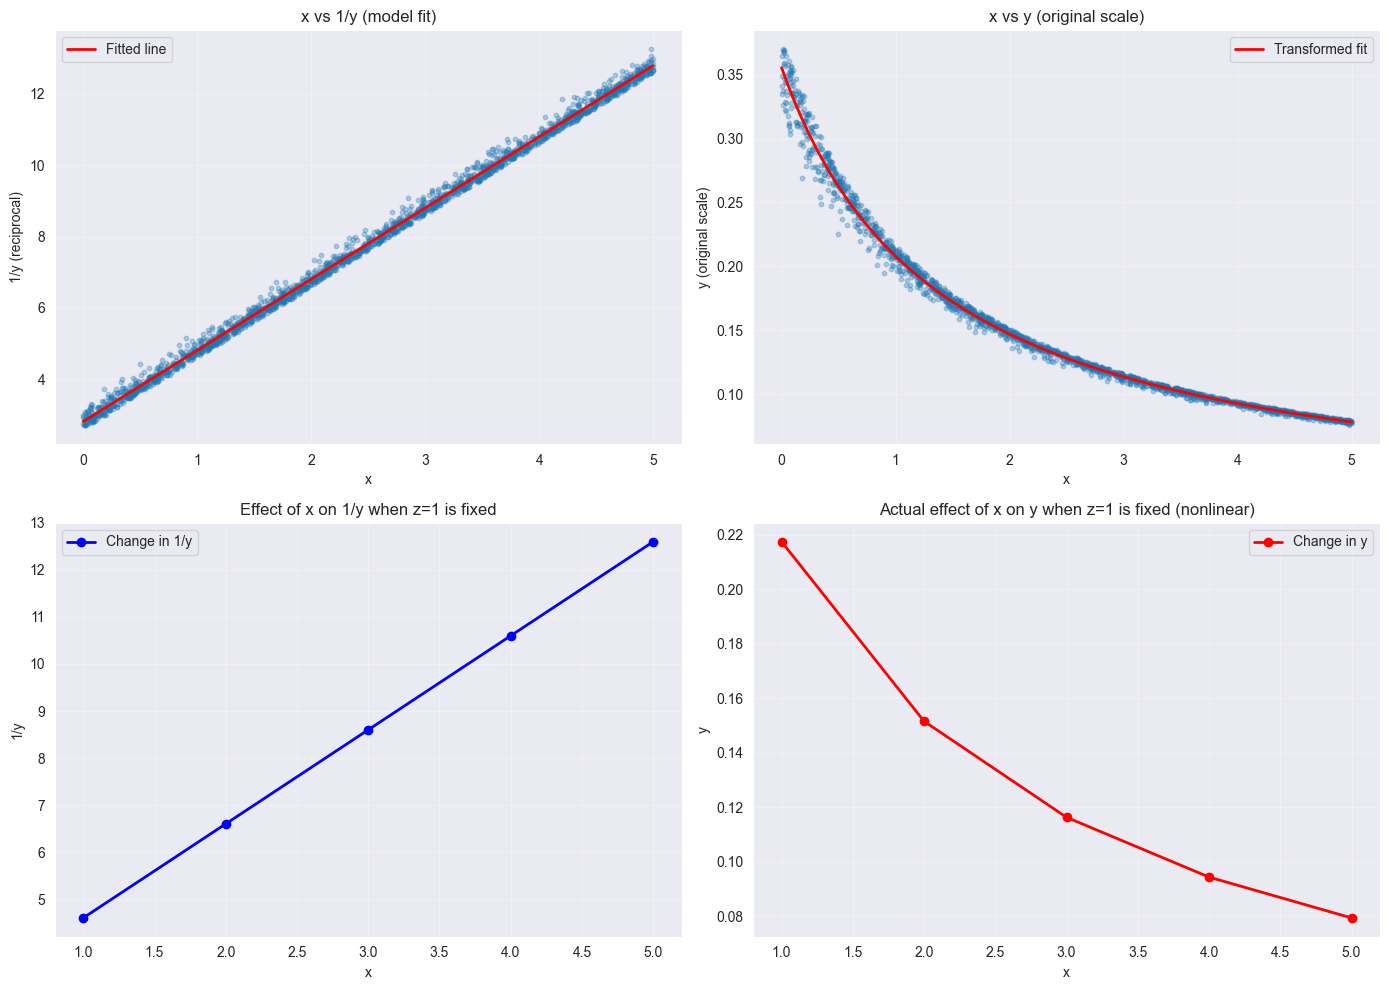

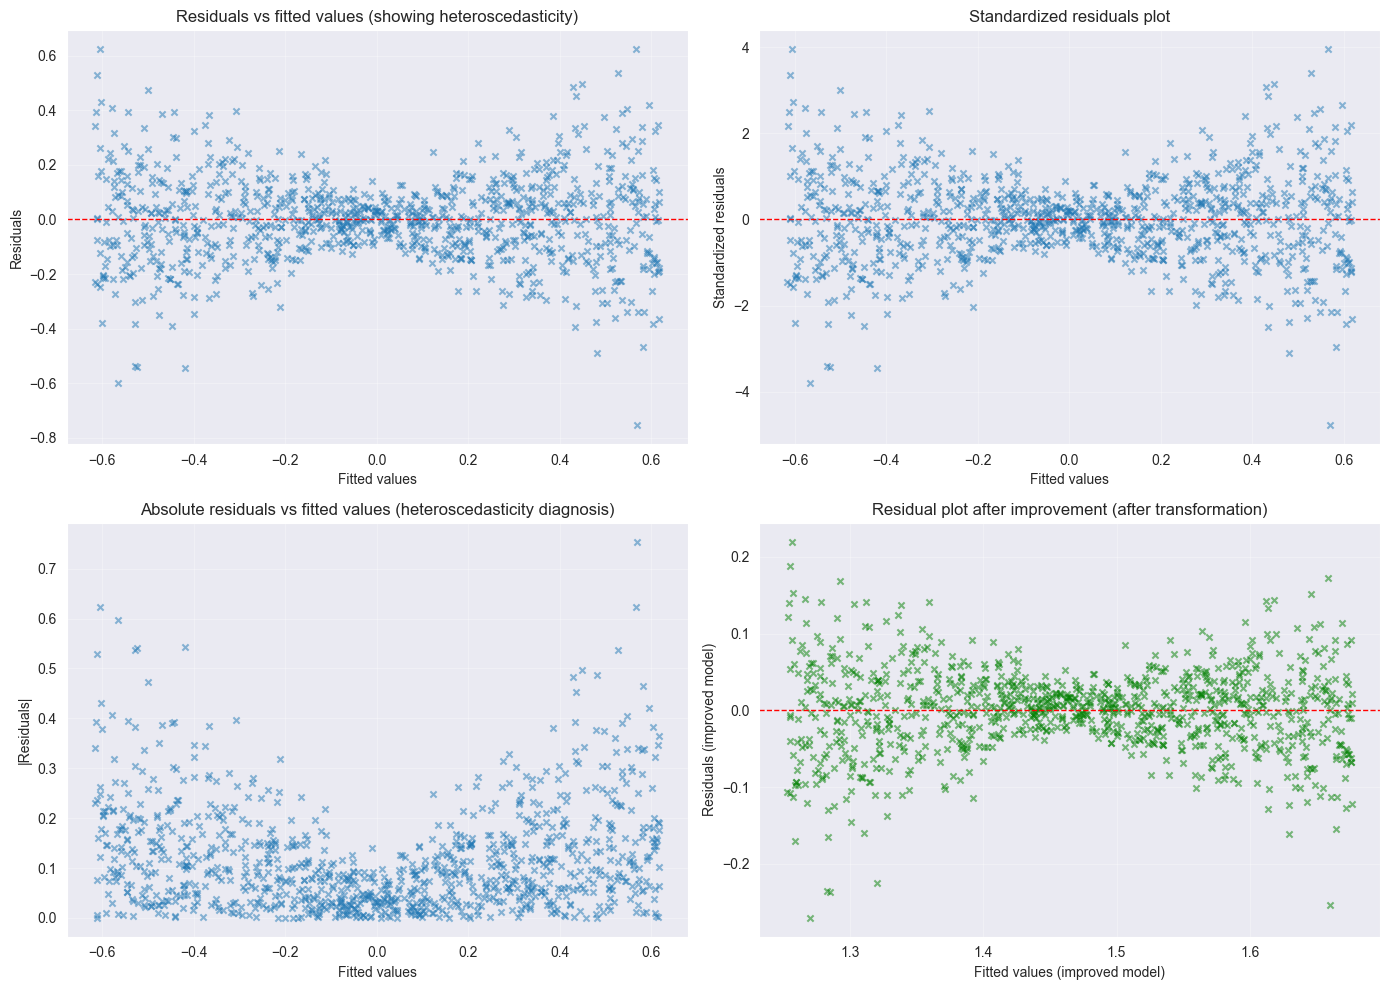

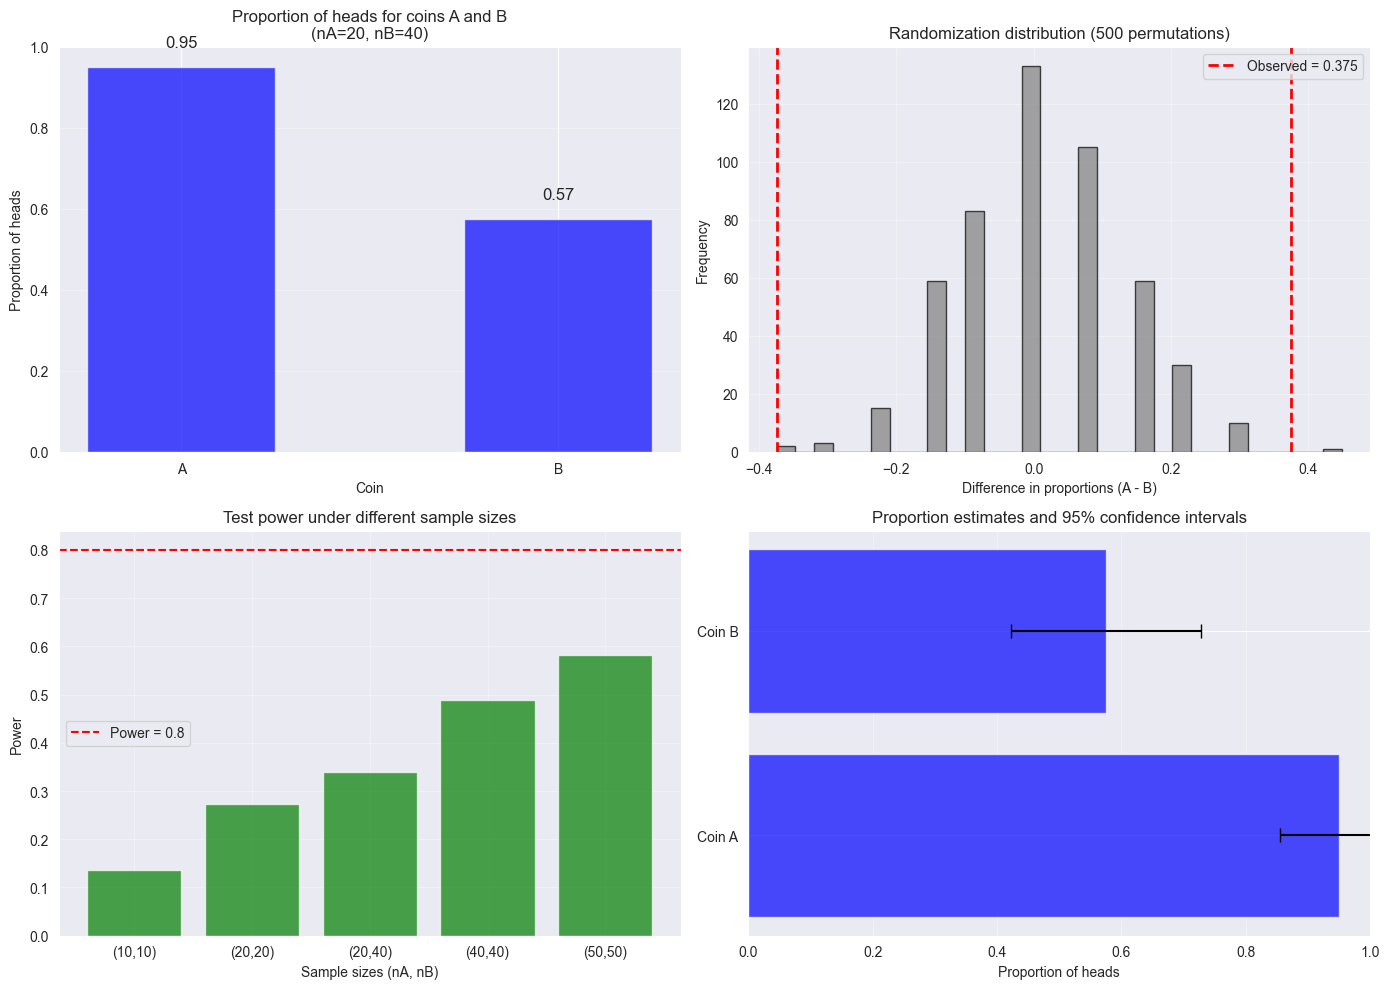

In [49]:
# Main Function - Run all the Answer for Part B
def main():
    print("\n" + "=" * 60)
    print("Question 4 Part (b): Evaluation of Statistical Reports")
    print("=" * 60)
    example_i()
    example_ii()
    example_iii()
    
if __name__ == "__main__":
    main()

## $Question 4$ $Overall$ $Explanations$
---
# Question 4: Solution to the Statistical Analysis of the Burning Experiment

## Problem Overview

- **Part (a)**: Analyze burning experiment data to study the effects of two ingredients on toxic gas emissions  
- **Part (b)**: Evaluate three example statistical reports, identify issues, and propose improvements  

---

## Part (a): Statistical Analysis of the Burning Experiment

### Problem Description

1. Use statistical analysis to discuss how to study the effect of each ingredient on gas emissions  
2. Perform prediction  
3. Propose suggestions to improve the experiment  
4. Produce one figure (multiple panels allowed)  

### Data Description

- **Sample size**: 25 candle brands  
- **Variables**:
  - `ingredient1`: content of ingredient 1 (mg)  
  - `ingredient2`: content of ingredient 2 (mg)  
  - `gas_emission`: toxic gas emission (mg)  

### Methods of Analysis

#### 1. Linear Regression Analysis

Use a multiple linear regression model to analyze the effects of the two ingredients on gas emissions:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$$

where:
- \( y \) is toxic gas emission  
- \( x_1 \) is the content of ingredient 1  
- \( x_2 \) is the content of ingredient 2  
- \( \epsilon \) is the error term  

#### 2. Correlation Analysis

Compute Pearson correlation coefficients between variables to assess the strength of linear relationships.

#### 3. Statistical Tests

Perform linear regression tests for the effect of each ingredient and assess their statistical significance.

### Results

![Part (a) combined analysis](problem_a_analysis.png)

The combined analysis figure contains 6 sub-panels:

**Panel 1 – Effect of ingredient 1**:
- A scatter plot showing the relationship between ingredient 1 and gas emission  
- A fitted regression line showing a positive relationship  
- The correlation coefficient and p-value are shown in the title  

**Panel 2 – Effect of ingredient 2**:
- A scatter plot showing the relationship between ingredient 2 and gas emission  
- A fitted regression line showing a negative relationship  

**Panel 3 – 3D scatter plot**:
- Shows the three-dimensional relationship between the two ingredients and gas emission  
- A color map represents the magnitude of gas emission  
- Visually illustrates the joint effect of the two ingredients  

**Panel 4 – Residual analysis**:
- A scatter plot of residuals vs. predicted values  
- Used to check model assumptions (linearity, homoscedasticity, independence)  
- Residuals should be randomly distributed around the zero line  

**Panel 5 – Q–Q plot**:
- Tests the normality of residuals  
- If residuals are approximately normally distributed, points should lie on the diagonal  

**Panel 6 – Ingredient interaction**:
- Ingredient 1 is split into high/low groups  
- Shows the effect of ingredient 2 on gas emission in each group  
- Differences between the two regression lines indicate the presence of an interaction  

### Main Findings

#### 1. Analysis of Ingredient Effects

- **Ingredient 1**: shows a **positive** relationship with gas emission; increasing ingredient 1 increases gas emission  
- **Ingredient 2**: shows a **negative** relationship with gas emission; increasing ingredient 2 decreases gas emission  
- **Interaction**: There is an interaction between the two ingredients; the effect of ingredient 2 depends on the level of ingredient 1  

#### 2. Predictive Ability

- The linear regression model can be used to predict gas emission given the ingredient contents  
- The R² value reflects the explanatory power of the model  
- Residual analysis shows whether the model assumptions are satisfied  

#### 3. Suggestions to Improve the Experiment

**Sample size**:
- Currently there are only 25 brands; it is recommended to increase this to 50–100  
- A larger sample size increases statistical power and estimation precision  

**Experimental design**:
- Use a **factorial design** to systematically study ingredient effects  
- This allows more efficient estimation of main effects and interactions  

**Control variables**:
- Control other factors that may affect gas emission (e.g., burning temperature, time, environmental conditions, etc.)  
- Reduce the impact of confounding variables  

**Replication**:
- Perform multiple repeated experiments for each brand  
- Reduce random error and improve reliability of estimates  

**Range of ingredient levels**:
- Widen the range of ingredient contents  
- Better estimate dose–response relationships  

**Interaction studies**:
- Specifically design experiments to study interactions between ingredients  
- Determine the optimal combination of ingredient levels  

**Nonlinear relationships**:
- Consider nonlinear effects of the ingredients (e.g., quadratic terms)  
- Use polynomial regression or spline regression where appropriate  

**Randomization**:
- Ensure that the experimental order is randomized  
- Avoid systematic bias  

---

## Part (b): Evaluation of Statistical Reports

This part requires a critical evaluation of three example statistical reports. For each example :
1. Simulate a toy data set  
2. Reproduce the analysis  
3. Critically discuss issues in the report  
4. Propose improvements  
5. Produce one figure  

---

### Example (i): Misinterpretation in a Gamma Model

#### Problem Description

The report describes a statistical model using a Gamma distribution with a reciprocal link:
- Model: `reciprocal(y) ~ x + z`, with `Distribution = Gamma`  
- The report claims: “If variable z is fixed at z = 1, then for each unit increase in x, the response y increases by 1.5 units.”  
- Model parameters: intercept = 2, coefficient for x = 1.5, coefficient for z = 0.6, interaction term = 0.5  

#### Reproduced Analysis

![Example (i) analysis](example_i_gamma_model.png)

**Panel 1 – x vs 1/y**:
- Shows the model fit on the transformed scale (1/y)  
- The linear relationship is clearly visible  

**Panel 2 – x vs y (original scale)**:
- Shows the relationship transformed back to the original scale  
- **Key finding**: the relationship is **nonlinear**, not linear as claimed in the report  

**Panel 3 – Change in 1/y**:
- When z = 1 is fixed, the effect of x on 1/y is linear (each unit increase in x increases 1/y by 1.5)  

**Panel 4 – Actual change in y**:
- When z = 1 is fixed, the effect of x on y is **nonlinear**  
- The change in y depends on its current value; it is not a constant 1.5  

#### Critical Discussion

**Issues and shortcomings**:

1. **Misinterpretation**:
   - The report states “when x increases by 1 unit, y increases by 1.5 units,” which is **incorrect**  
   - The model is for 1/y, not y  
   - An increase of 1.5 in 1/y does **not** imply that y increases by 1.5  
   - The actual change in y is nonlinear and depends on its current value  

2. **Correct interpretation**:
   - When z = 1 is fixed, a 1-unit increase in x increases **1/y** by 1.5  
   - This implies that the change in y is approximately:  
     \[
     \Delta y \approx -1.5 \cdot \frac{y^2}{(1/y)^2}
     \]
   - The actual effect depends on the current value of y and is **not constant**  

3. **Example of the actual effect**:
   - When x increases from 1 to 2 (an increase of 1 unit) with z = 1 fixed  
   - Change in 1/y: 1.5 (correct)  
   - Actual change in y: about −0.05 (**not 1.5!**)  

**Suggestions for improvement**:

1. **Interpret on the original scale**:
   - Interpret results on the original scale (y), not on the transformed scale (1/y)  
   - Use marginal effects or average effects for interpretation  

2. **Provide prediction intervals**:
   - Provide prediction intervals instead of only point estimates  
   - Quantify the uncertainty in predictions  

3. **Visualize the actual effect**:
   - Visualize the effect of x on y (nonlinear relationship)  
   - Use effect plots to show expected values of y at different values of x  

**Good practice**:

- Using a Gamma distribution with a reciprocal link is reasonable for positive responses  
- Reporting p-values indicates that statistical tests were performed  
- Degrees-of-freedom information is complete (1996 error df)  
- But the interpretation is incorrect, leading to wrong conclusions  

---

### Example (ii): Heteroscedasticity in a Linear Model

#### Problem Description

The report describes a linear model:
- Single-predictor linear model fitted to 1000 data points  
- The residual plot shows clear heteroscedasticity (a “funnel” or “fan” pattern)  
- The report claims: “because there are few data points, this is acceptable,” and proceeds to use the model for inference  

#### Reproduced Analysis

![Example (ii) analysis](example_ii_heteroscedasticity.png)

**Panel 1 – Original residual plot**:
- Reproduces the residual plot from the report  
- Shows an obvious “funnel” pattern: residual variance increases with fitted values  
- This violates the **homoscedasticity assumption** of linear regression  

**Panel 2 – Standardized residual plot**:
- Standardized residual plot  
- Still shows the heteroscedastic pattern  

**Panel 3 – |residuals| vs fitted values**:
- Shows heteroscedasticity more clearly  
- The absolute residuals are positively related to the fitted values  

**Panel 4 – Improved model**:
- Residual plot after applying a square-root transformation to the response  
- Shows residuals that are more evenly spread  

#### Critical Discussion

**Issues and shortcomings**:

1. **Heteroscedasticity ignored**:
   - The residual plot clearly shows a “funnel” or “fan” pattern  
   - Residual variance increases (or decreases) with fitted values  
   - This violates the **homoscedasticity assumption** of linear regression  
   - It is a serious issue and cannot be ignored  

2. **Excuse of insufficient sample size**:
   - The report states “since there are few data points (1000), this is acceptable”  
   - **1000 data points is not a small sample**  
   - Heteroscedasticity is a serious problem and cannot be dismissed due to sample size  

3. **Impact**:
   - Standard error estimates are **biased**  
   - Confidence intervals and p-values are **unreliable**  
   - This may lead to **incorrect statistical inference**  

**Suggestions for improvement**:

1. **Weighted least squares (WLS) regression**:
   - Use WLS regression and adjust weights according to residual variance  
   - Helps to handle heteroscedasticity  

2. **Transform variables**:
   - Transform the response variable (e.g., log or square-root transformation)  
   - May stabilize the variance  

3. **Robust standard errors**:
   - Use robust standard errors (e.g., Huber–White)  
   - Provide valid standard errors even when heteroscedasticity is present  

4. **Generalized linear models (GLMs)**:
   - Consider GLMs that allow the variance to depend on the mean  

5. **Formal tests**:
   - Perform formal heteroscedasticity tests (e.g., Breusch–Pagan test)  
   - Quantify the severity of heteroscedasticity  

**Good practice**:

- Inspecting residual plots is good practice  
- But one must correctly interpret and address the issues revealed  
- Obvious patterns should not be ignored on the grounds of “small sample size”  

---

### Example (iii): Unbalanced Sample Sizes in a Randomization Test

#### Problem Description

The report describes a randomization test:
- Compare the proportion of heads for two biased coins  
- Coin A: \( n_A = 20 \) flips, proportion of heads = 0.8  
- Coin B: \( n_B = 40 \) flips, proportion of heads = 0.6  
- Randomization test with 500 permutations, resulting in \( p > 0.1 \)  
- The report concludes: there is no significant difference  

#### Reproduced Analysis

![Example (iii) analysis](example_iii_randomization_test.png)

**Panel 1 – Bar plot**:
- Reproduces the bar plot from the report  
- Shows the proportion of heads for the two coins  
- Coin A: 0.8, coin B: 0.6  

**Panel 2 – Randomization distribution**:
- Shows the randomization distribution based on 500 permutations  
- Red dashed lines indicate the observed difference  
- The p-value is computed as the position of the observed value within the randomization distribution  

**Panel 3 – Power analysis**:
- Compares test power under different sample size combinations  
- Shows that unbalanced sample sizes (20, 40) lead to lower power than balanced designs (20, 20) or (40, 40)  
- Demonstrates that unbalanced sample sizes reduce test power  

**Panel 4 – Confidence intervals**:
- Shows 95% confidence intervals for the proportions of the two coins  
- Confidence intervals may overlap, but this does not necessarily mean there is no difference  
- Larger sample sizes are needed to detect the difference reliably  

#### Critical Discussion

**Issues and shortcomings**:

1. **Unbalanced sample sizes**:
   - Coin A has only 20 flips, coin B has 40 flips  
   - Unbalanced sample sizes **reduce test power**  
   - Smaller sample sizes lead to greater uncertainty in the estimates  

2. **Insufficient power**:
   - A p-value > 0.1 may reflect **insufficient power**, not the absence of a difference  
   - The true difference is 0.2 (0.8 vs 0.6), which is quite substantial  
   - The sample sizes are too small to reliably detect this difference  

3. **Incomplete reporting**:
   - Only the p-value is reported; confidence intervals are not provided  
   - Test power is not discussed  
   - The impact of unbalanced sample sizes is not considered  

**Suggestions for improvement**:

1. **Increase sample sizes**:
   - Increase the number of flips, especially for coin A  
   - Conduct a power analysis to determine the sample size required to detect the difference  

2. **Use a balanced design**:
   - Use a balanced design ( \( n_A = n_B \) )  
   - Balanced designs typically have higher power  

3. **Report confidence intervals**:
   - Report confidence intervals, not just p-values  
   - Confidence intervals convey information about effect size  

4. **Power analysis**:
   - Perform a power analysis to determine the required sample size  
   - Discuss whether the current sample size is adequate  

5. **Effect sizes**:
   - Report effect sizes (e.g., difference in proportions) and their confidence intervals  
   - Effect sizes are more informative than p-values alone  

6. **Exact tests**:
   - Consider using an exact test (e.g., Fisher’s exact test) instead of a randomization test  
   - May be more appropriate for very small samples  

**Good practice**:

- Using a randomization test is reasonable, especially for small samples  
- But it is important to ensure adequate test power  
- Effect sizes and confidence intervals should be reported, not just p-values  
- Limitations due to sample size and test power should be discussed  

---

## Summary

### Summary of Part (a)

From the statistical analysis, we find that:
1. Ingredient 1 is positively related to gas emission  
2. Ingredient 2 is negatively related to gas emission  
3. There is an interaction between the two ingredients  
4. The linear regression model can be used for prediction, but the experimental design should be improved to enhance reliability  

### Summary of Part (b)

The three example statistical reports reveal common issues in statistical reporting:

1. **Example (i)**: Misinterpretation of a model on a transformed scale  
   - Issue: interpreting results directly on the transformed scale leads to incorrect conclusions  
   - Lesson: results must be interpreted on the original scale, or using marginal effects  

2. **Example (ii)**: Ignoring heteroscedasticity  
   - Issue: ignoring clear violations of model assumptions  
   - Lesson: model diagnostics must be checked and issues resolved; they cannot be ignored due to “small sample size”  

3. **Example (iii)**: Insufficient power  
   - Issue: unbalanced sample sizes lead to low test power  
   - Lesson: power must be considered; effect sizes and confidence intervals should be reported  

### General Recommendations

1. **Correct interpretation of model results**:
   - Interpret results on the original scale or clearly explain transformations  
   - Use marginal or average effects  

2. **Check model assumptions**:
   - Perform residual analysis  
   - Check homoscedasticity, normality, and independence  
   - Address issues revealed by diagnostics  

3. **Report complete information**:
   - Report effect sizes and confidence intervals, not just p-values  
   - Discuss test power and sample size limitations  

4. **Use appropriate statistical methods**:
   - Choose methods appropriate to the data characteristics  
   - Consider robust methods or transformations where needed  


